Dataset: https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection

In [3]:
import pandas as pd 
import numpy as np 
df_data = pd.read_csv("fraud_oracle.csv")
df_data.head()
df_data.info()
df_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

Writing the below code to see unique values of each column except policy number because that's a unique value for each record

In [2]:
for column in df_data.columns:
    if column != 'PolicyNumber':
        unique_values = sorted(df_data[column].unique())
        print(column)
        print(unique_values, "\n")

Month
['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonth
[1, 2, 3, 4, 5] 

DayOfWeek
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

Make
['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW'] 

AccidentArea
['Rural', 'Urban'] 

DayOfWeekClaimed
['0', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

MonthClaimed
['0', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonthClaimed
[1, 2, 3, 4, 5] 

Sex
['Female', 'Male'] 

MaritalStatus
['Divorced', 'Married', 'Single', 'Widow'] 

Age
[0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7

To analyze the range, central tendency and spread of numerical variables to understand their distribution and to see how many values of age are zero

In [3]:
# Select the numerical variables from the DataFrame
numerical_variables = ['Age', 'VehiclePrice', 'Deductible', 'DriverRating']

print (df_data[df_data['Age'] == 0].shape[0])
# Calculate the range, mean, median, and standard deviation for each numerical variable
summary_stats = df_data[numerical_variables].describe()
print(summary_stats)

320
                Age    Deductible  DriverRating
count  15420.000000  15420.000000  15420.000000
mean      39.855707    407.704280      2.487808
std       13.492377     43.950998      1.119453
min        0.000000    300.000000      1.000000
25%       31.000000    400.000000      1.000000
50%       38.000000    400.000000      2.000000
75%       48.000000    400.000000      3.000000
max       80.000000    700.000000      4.000000


In [4]:
df_data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [5]:
df_data = df_data[df_data['Age'] != 0]
df_data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000
mean,2.791126,2.694371,40.700331,0.059073,7728.474768,8.479669,407.874172,2.488212,1994.869272
std,1.287610,1.259930,12.309493,0.235769,4442.247706,4.600028,44.391196,1.120435,0.803246
min,1.000000,1.000000,16.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3889.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,39.000000,0.000000,7731.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,49.000000,0.000000,11576.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


From the above, we can see that one of our most important variables would be FraudFound_P where if it's value is 1, it was a fraud

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


892
14208


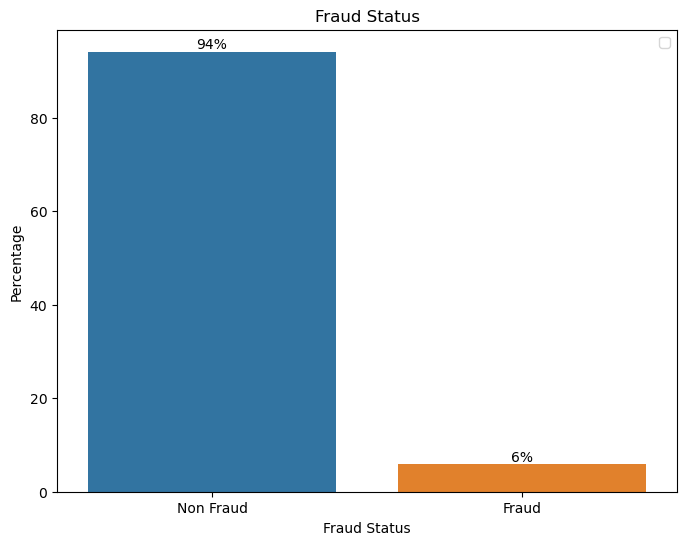

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate counts for FraudFound_P == 0 and 1
fraud_counts = df_data['FraudFound_P'].value_counts()
fraud_0_count = fraud_counts[0]
fraud_1_count = fraud_counts[1]

# Calculate percentages
total_count = len(df_data)
fraud_0_percent = fraud_0_count / total_count * 100
fraud_1_percent = fraud_1_count / total_count * 100

plt.figure(figsize=(8, 6))
# Create bar plot for FraudFound_P column
ax = sns.barplot(x=['Non Fraud', 'Fraud'], y=[fraud_0_percent, fraud_1_percent])

# Annotate the percentages on the plot
for p, percent in zip(ax.patches, [fraud_0_percent, fraud_1_percent]):
    ax.annotate(f'{round(percent)}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Set title and labels
ax.set_title('Fraud Status')
ax.set_xlabel('Fraud Status')
ax.set_ylabel('Percentage')
ax.legend()
print(fraud_1_count)
print(fraud_0_count)

# Display the plot
plt.show()


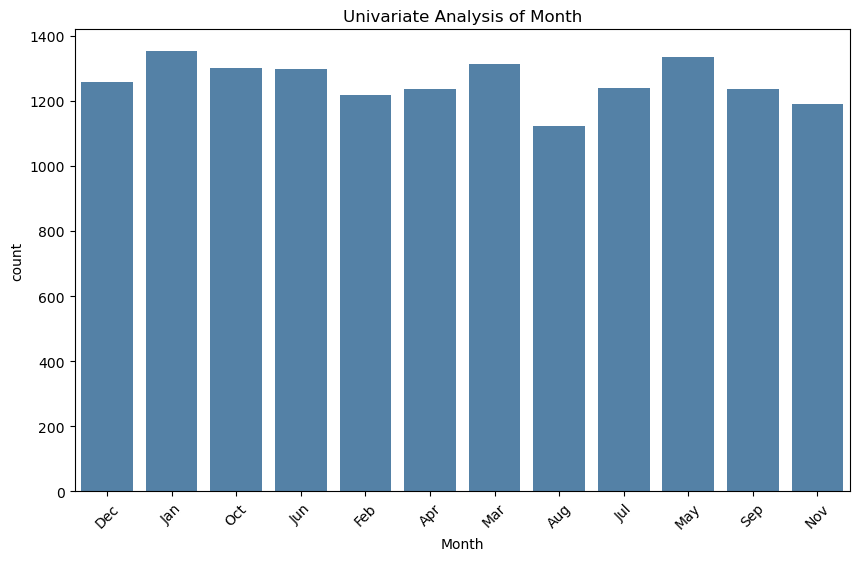

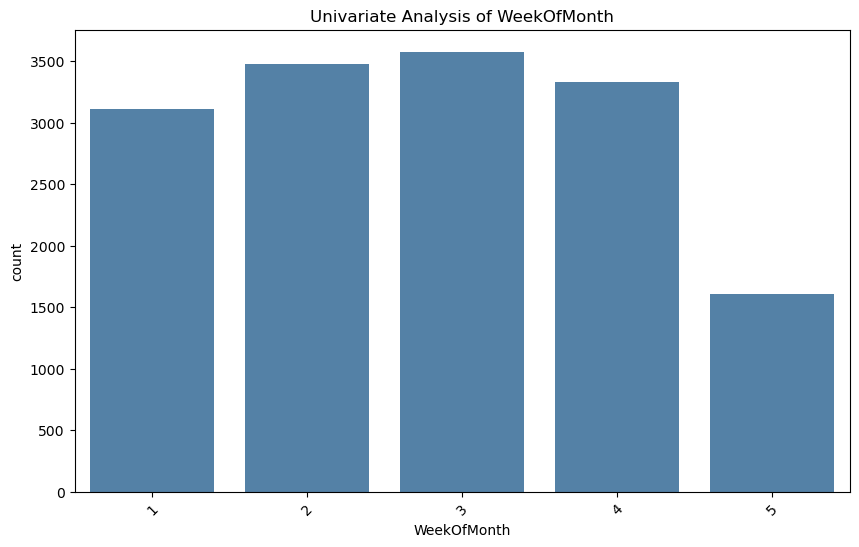

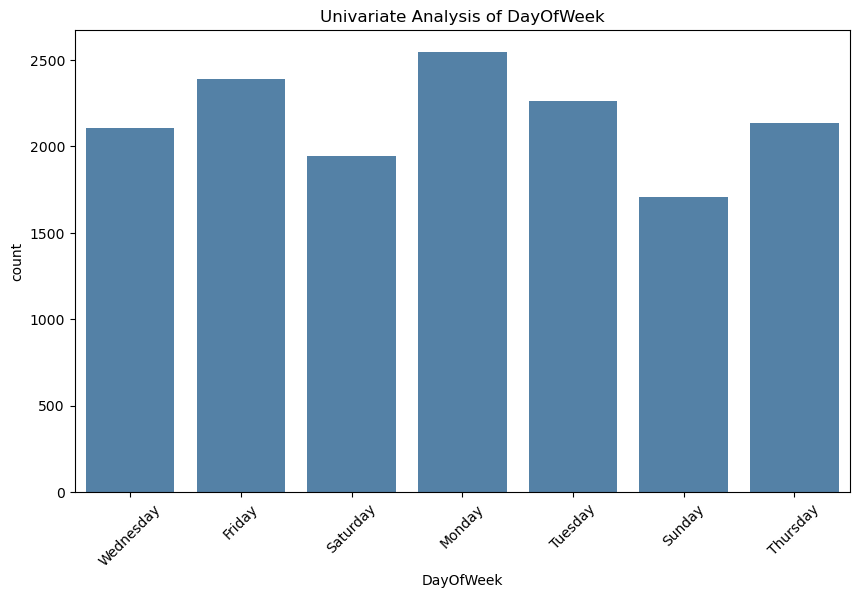

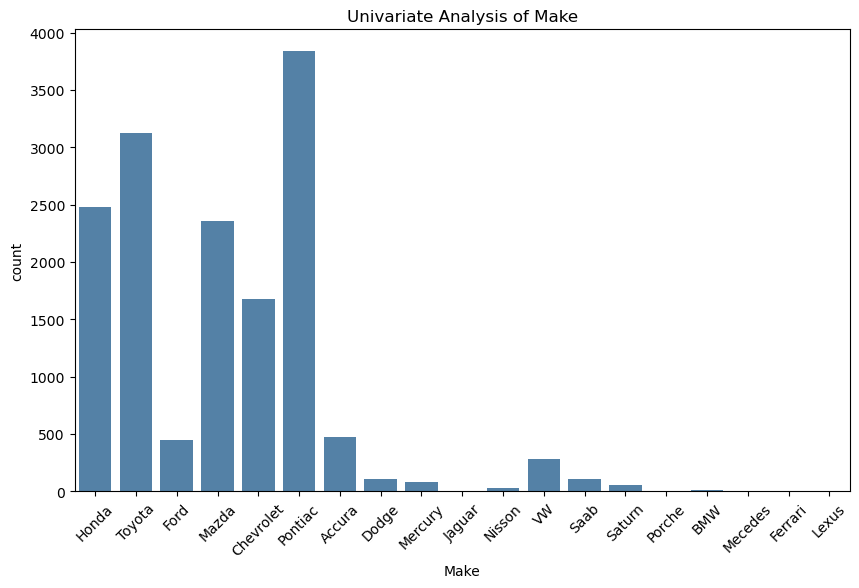

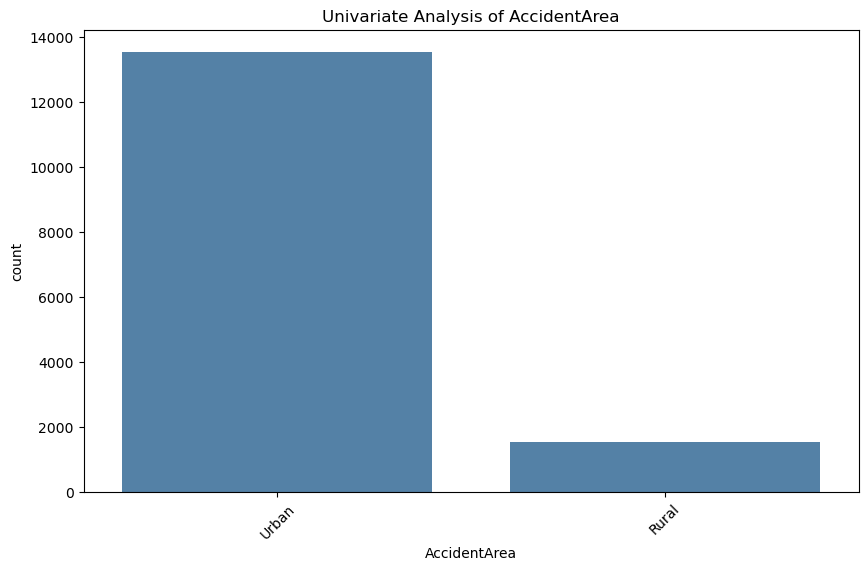

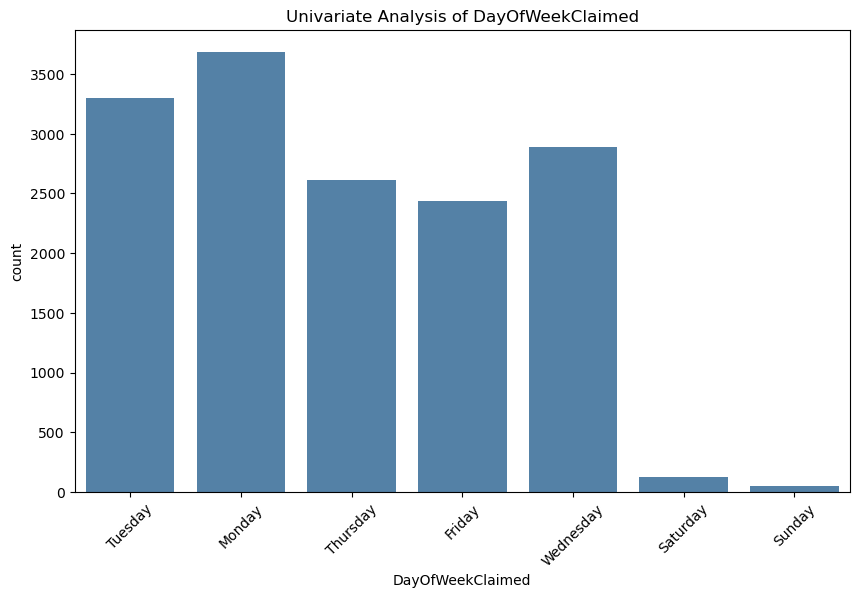

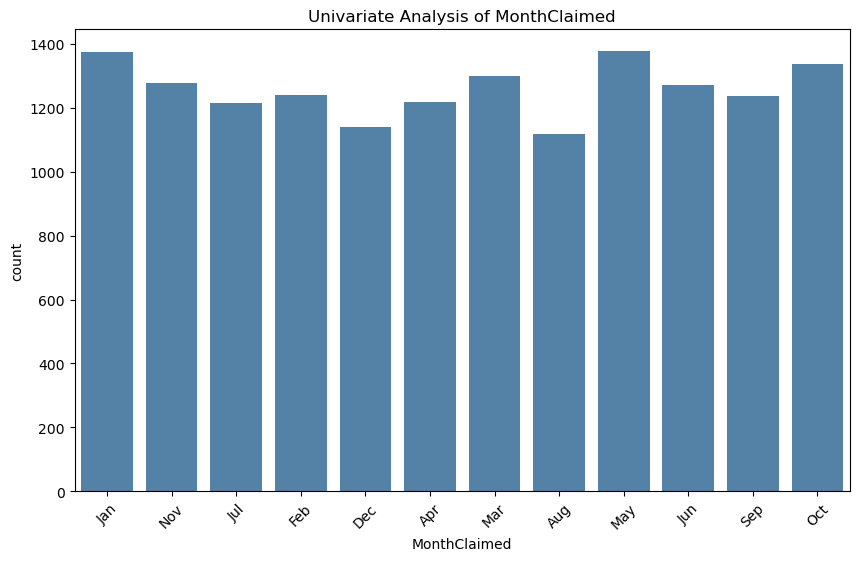

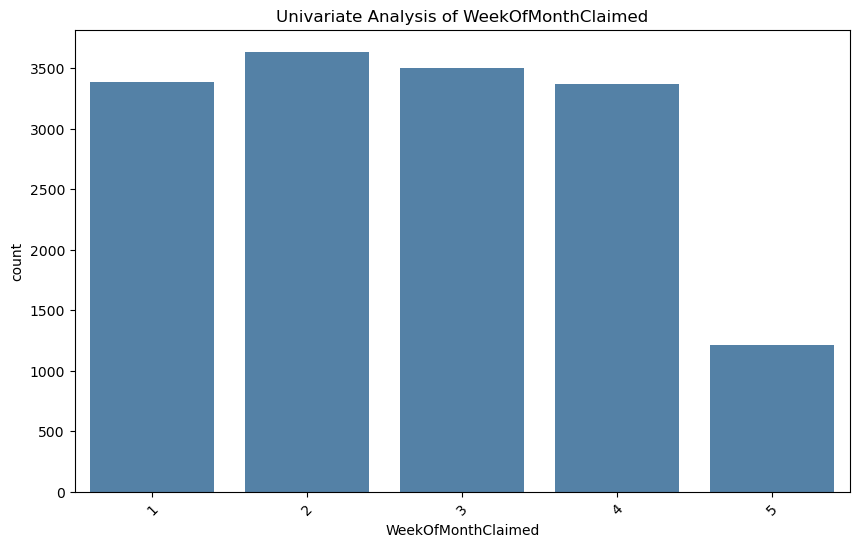

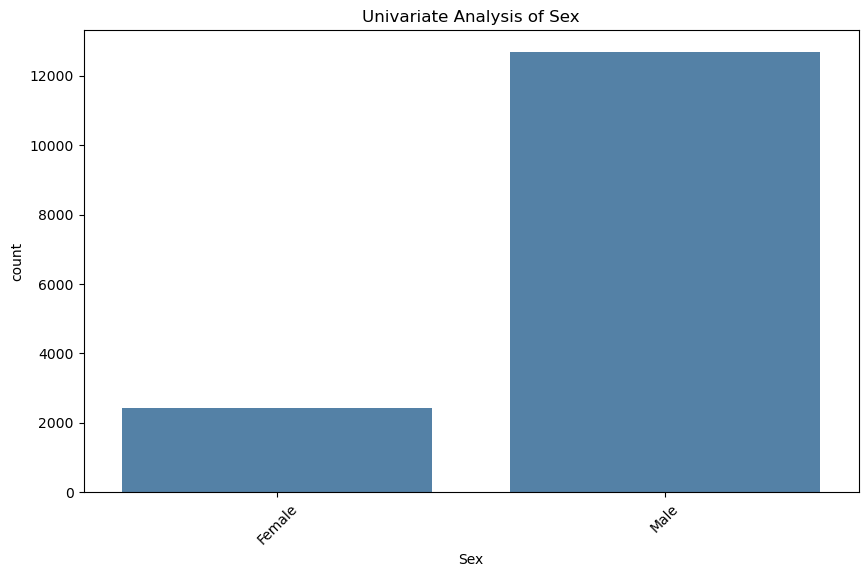

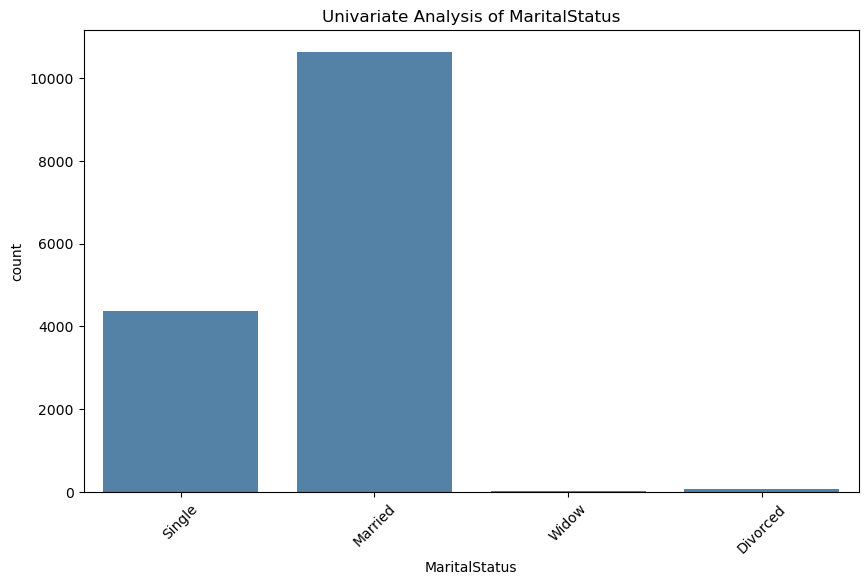

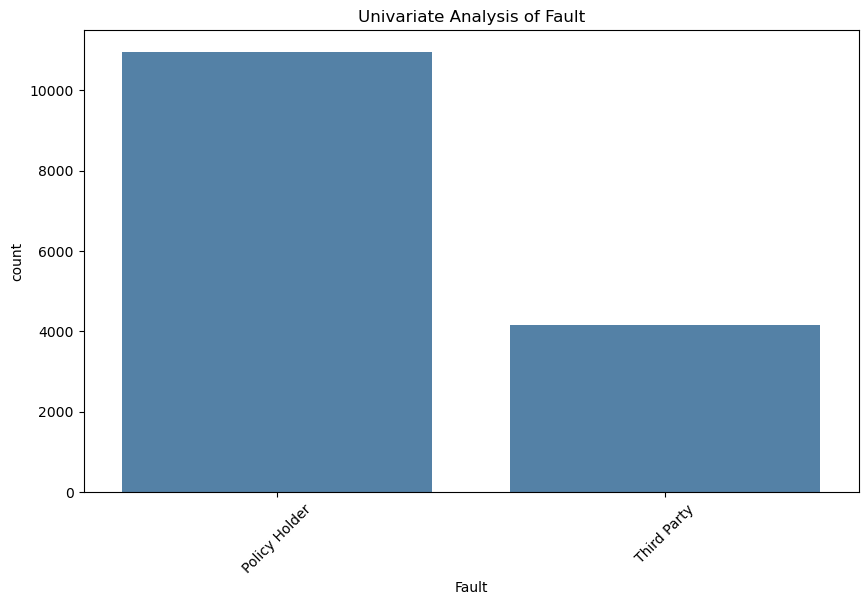

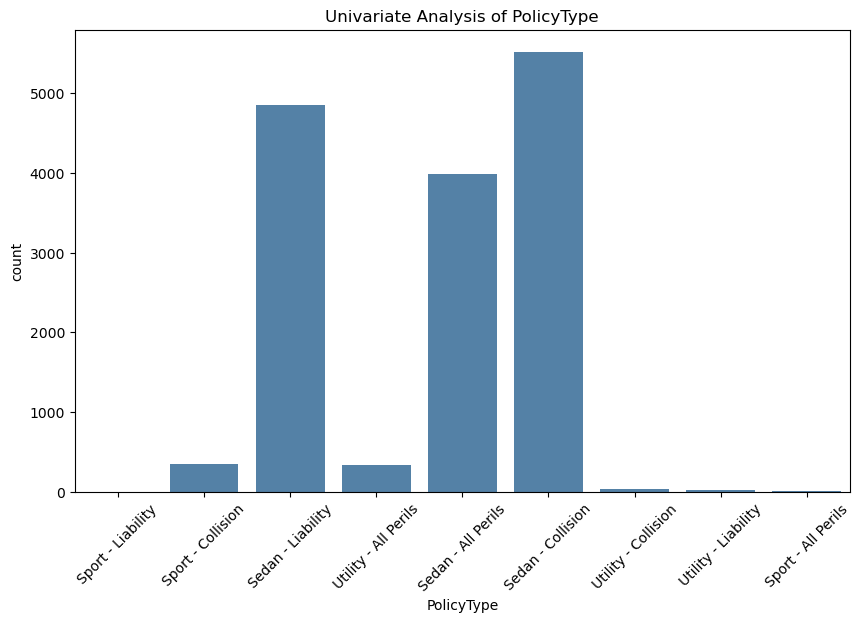

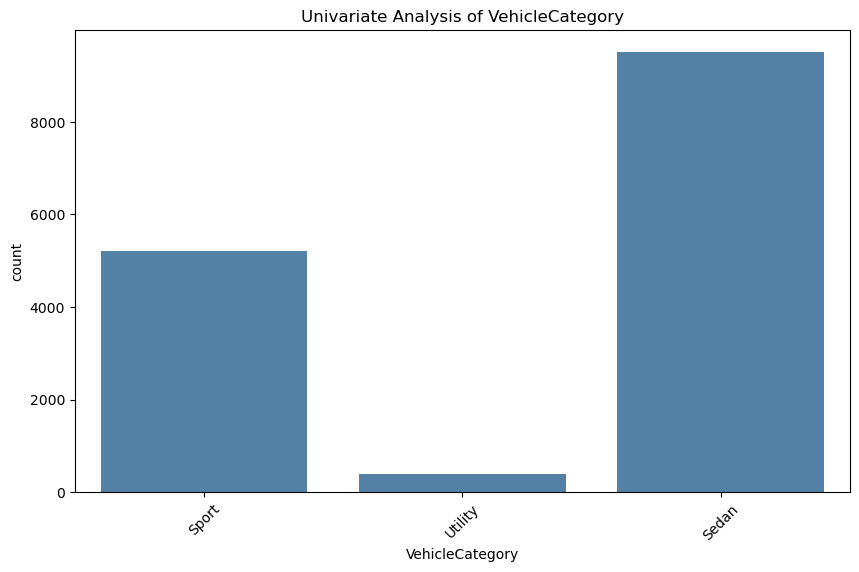

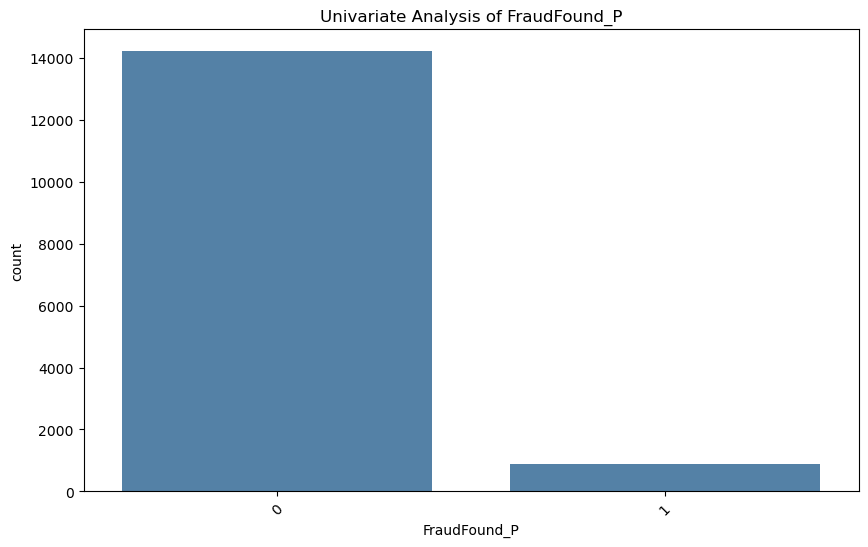

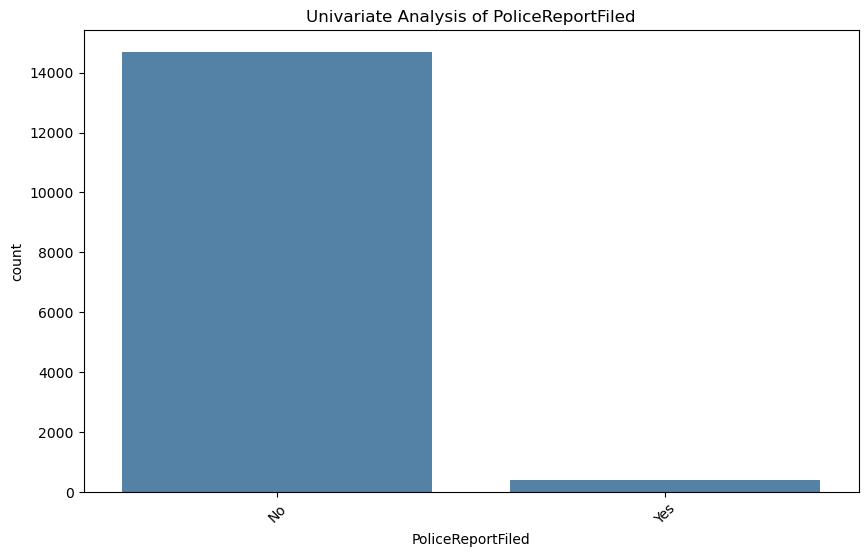

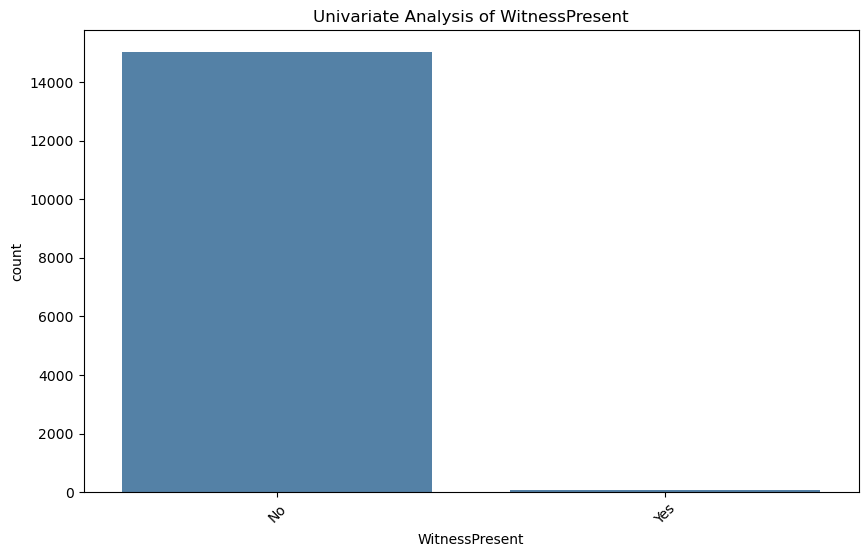

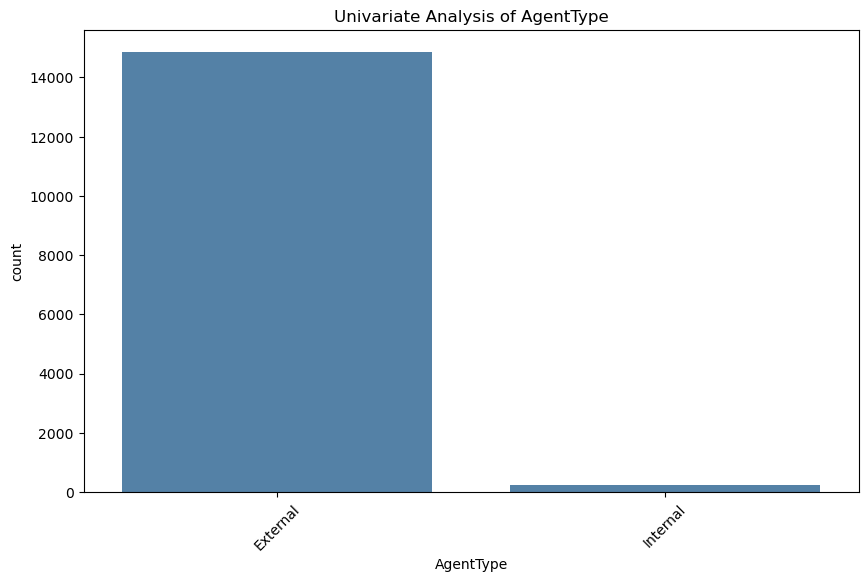

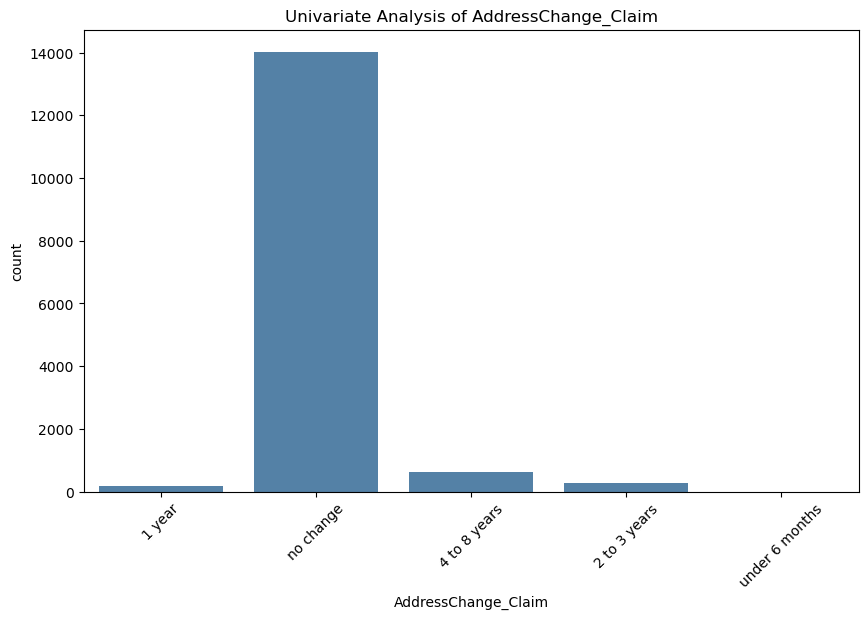

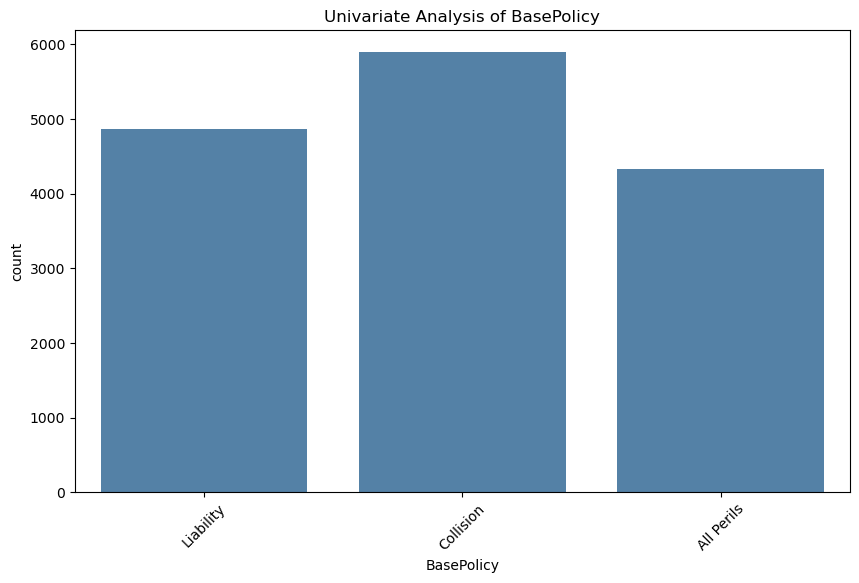

In [7]:
categorical_vars = ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
                    'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
                    'VehicleCategory', 'FraudFound_P', 'PoliceReportFiled',
                    'WitnessPresent', 'AgentType', 'AddressChange_Claim', 'BasePolicy']

# Perform univariate analysis with graphs for each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, data=df_data, color='steelblue')
    plt.title(f"Univariate Analysis of {var}")
    plt.xticks(rotation=45)
    plt.show()

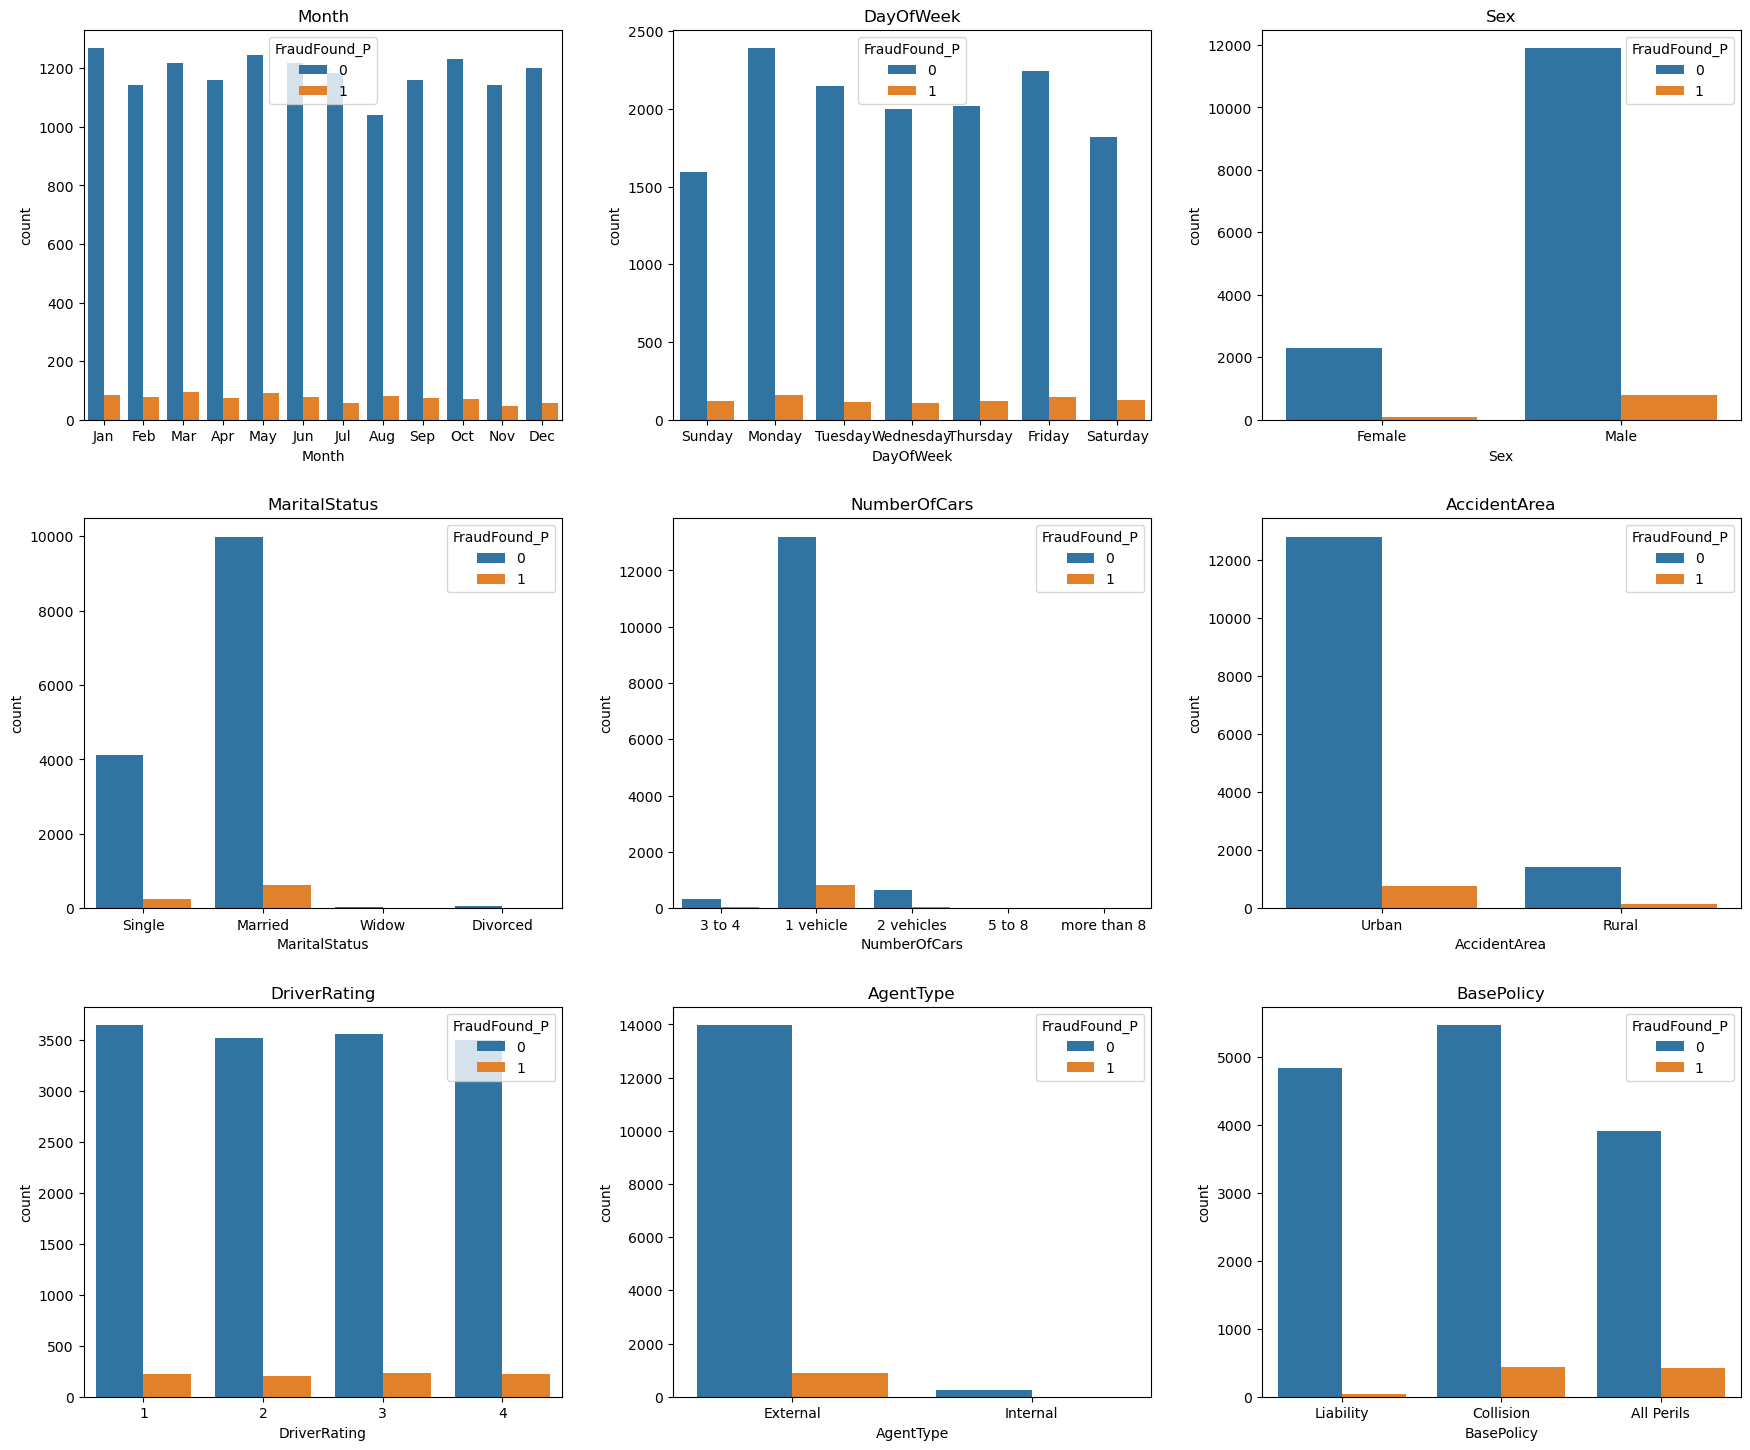

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure and subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Define the variables and their respective order for plotting
variables = ['Month', 'DayOfWeek', 'Sex', 'MaritalStatus', 'NumberOfCars', 'AccidentArea', 'DriverRating', 'AgentType', 'BasePolicy']
orders = [['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
          ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
          None, None, None, None, None, None, None]

# Generate count plots for each variable in the grid of subplots
for i, ax in enumerate(axes.flat):
    if i < len(variables):
        sns.countplot(data=df_data, x=variables[i], hue='FraudFound_P', order=orders[i], ax=ax)
        ax.set_title(variables[i])
    else:
        ax.axis('off')  # Hide unused subplots

# Adjust spacing between subplots for better layout
plt.tight_layout(pad=2.5)

# Display the plot
plt.show()


From this bivariate analysis below, it is easy to see that the number of frauds committed by males is higher than that committed by females, but the number of accidents is also much higher in males. The overall fraud percentage was seen higher in men at 6.29% and women at 4.34%.

In [9]:
# Calculate the total number of fraud cases
total_fraud_cases = len(df_data[df_data['FraudFound_P'] == 1])

# Calculate the percentage of females who committed fraud
female_accidents = len(df_data[df_data['Sex'] == 'Female'])
female_fraud_cases = len(df_data[(df_data['FraudFound_P'] == 1) & (df_data['Sex'] == 'Female')])
female_fraud_percentage = (female_fraud_cases / female_accidents) * 100

# Calculate the percentage of males who committed fraud
male_accidents = len(df_data[df_data['Sex'] == 'Male'])
male_fraud_cases = len(df_data[(df_data['FraudFound_P'] == 1) & (df_data['Sex'] == 'Male')])
male_fraud_percentage = (male_fraud_cases / male_accidents) * 100

# Print the results
print(f"Percentage of females who committed fraud: {female_fraud_percentage:.2f}%")
print(f"Percentage of males who committed fraud: {male_fraud_percentage:.2f}%")

Percentage of females who committed fraud: 4.34%
Percentage of males who committed fraud: 6.21%


In [10]:
# Calculate the percentage of fraud cases reported to the police
fraud_cases_reported = len(df_data[(df_data['FraudFound_P'] == 1) & (df_data['PoliceReportFiled'] == 'Yes')])
fraud_cases_reported_percentage = (fraud_cases_reported / total_fraud_cases) * 100

# Calculate the total number of non-fraud cases
total_non_fraud_cases = len(df_data[df_data['FraudFound_P'] == 0])

# Calculate the percentage of non-fraud cases reported to the police
non_fraud_cases_reported = len(df_data[(df_data['FraudFound_P'] == 0) & (df_data['PoliceReportFiled'] == 'Yes')])
non_fraud_cases_reported_percentage = (non_fraud_cases_reported / total_non_fraud_cases) * 100

# Print the results
print(f"Percentage of fraud cases reported to the police: {fraud_cases_reported_percentage:.2f}%")
print(f"Percentage of non-fraud cases reported to the police: {non_fraud_cases_reported_percentage:.2f}%")

Percentage of fraud cases reported to the police: 1.68%
Percentage of non-fraud cases reported to the police: 2.84%


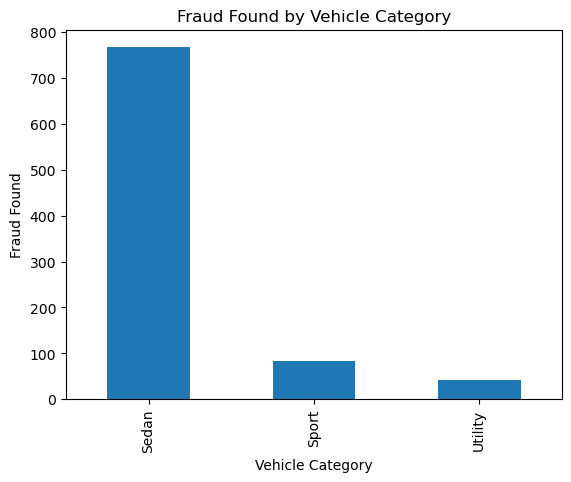

In [11]:
df_data.groupby('VehicleCategory')['FraudFound_P'].sum().plot(kind='bar')
plt.xlabel('Vehicle Category')
plt.ylabel('Fraud Found')
plt.title('Fraud Found by Vehicle Category')
plt.show()

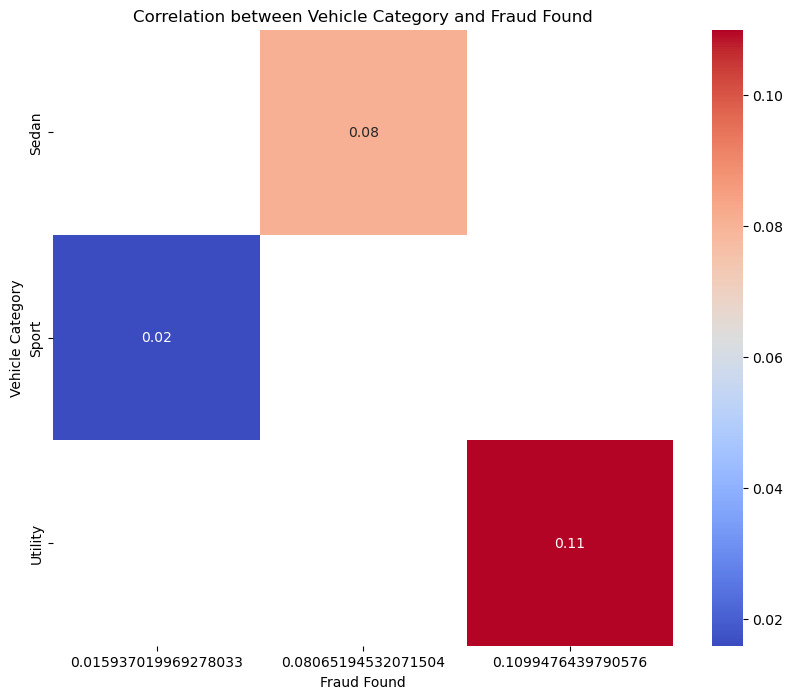

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called "df_data"
correlation_matrix = df_data.groupby('VehicleCategory')['FraudFound_P'].mean().reset_index()

# Pivot the correlation matrix to create a heatmap
heatmap_data = correlation_matrix.pivot(index='VehicleCategory', columns='FraudFound_P', values='FraudFound_P')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f")

# Set the title and labels
plt.title('Correlation between Vehicle Category and Fraud Found')
plt.xlabel('Fraud Found')
plt.ylabel('Vehicle Category')

# Display the plot
plt.show()


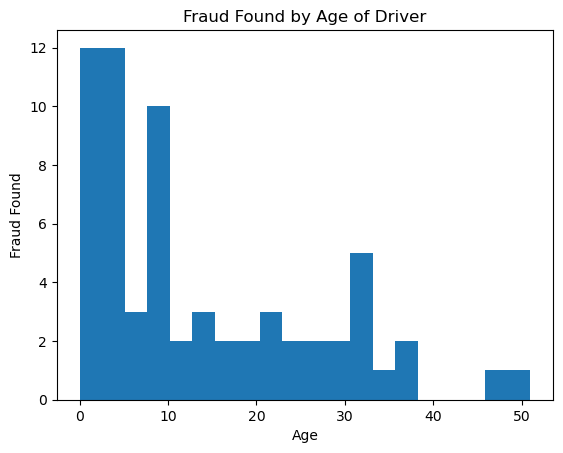

In [13]:
df_data.groupby('Age')['FraudFound_P'].sum().plot(kind='hist', bins = 20)
plt.xlabel('Age')
plt.ylabel('Fraud Found')
plt.title('Fraud Found by Age of Driver')
plt.show()

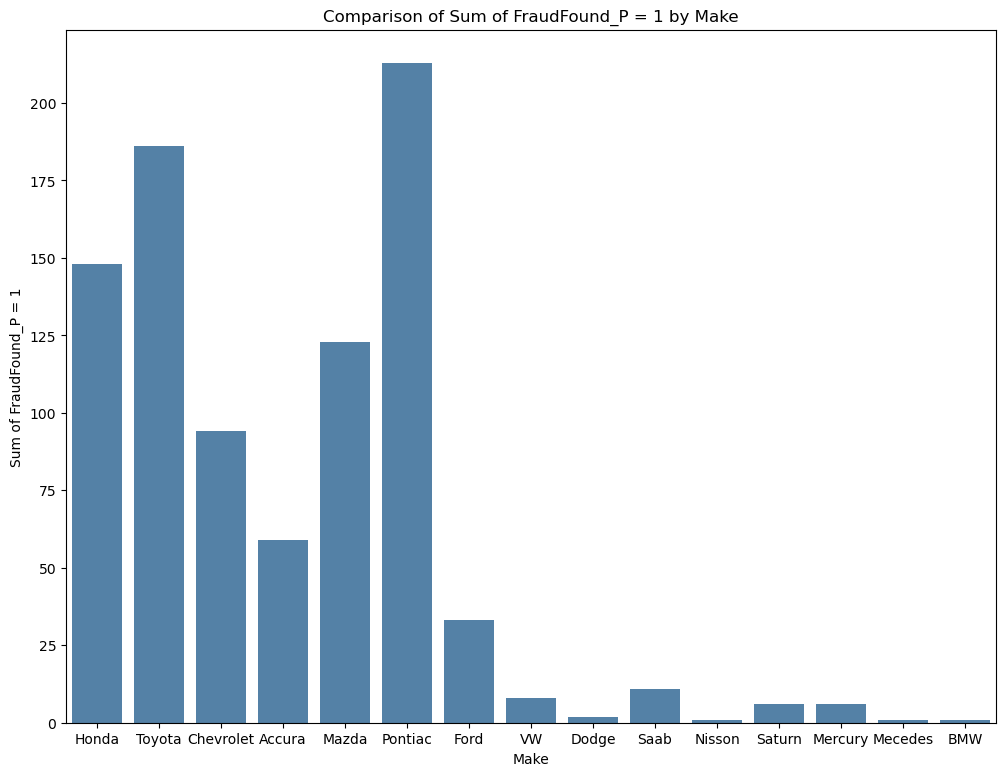

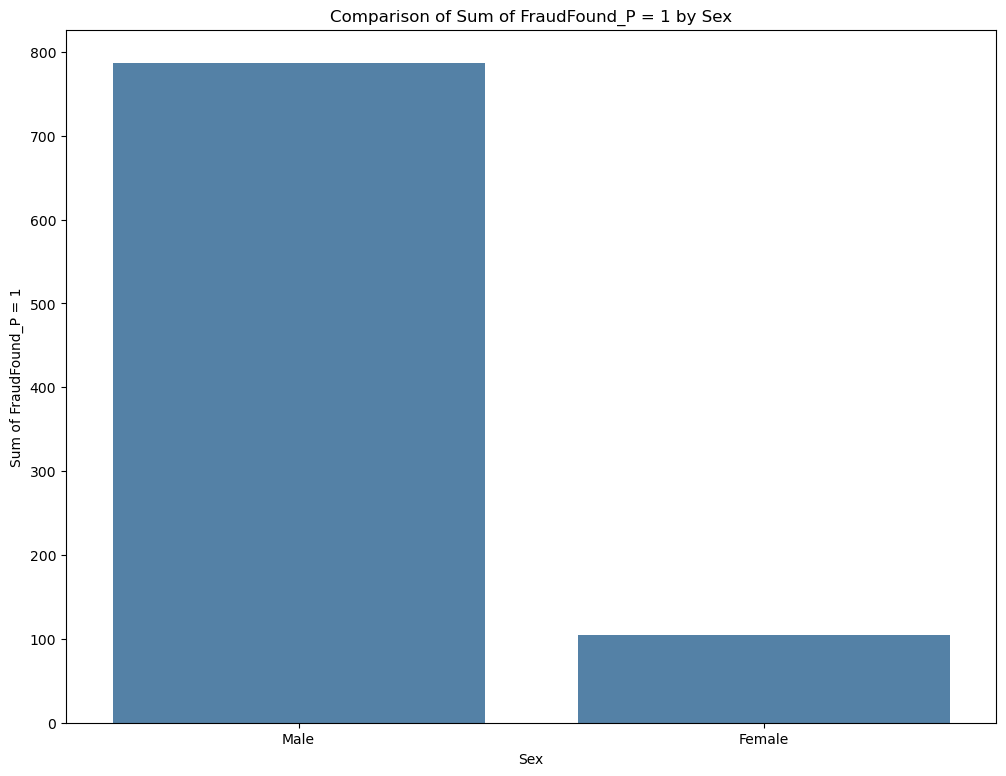

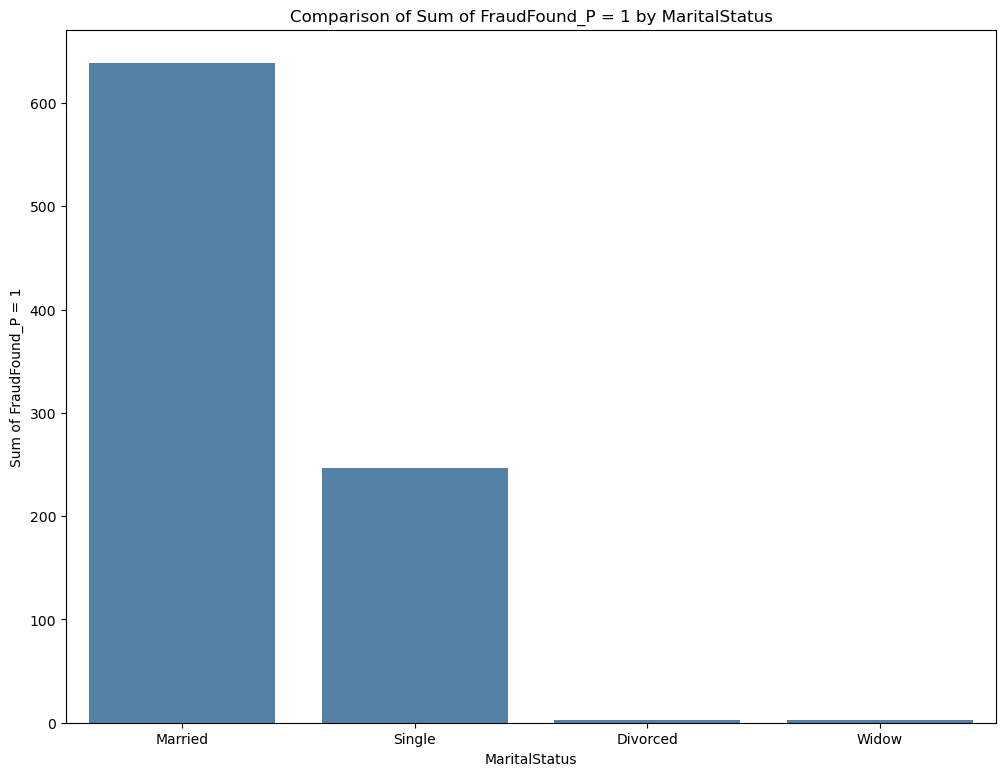

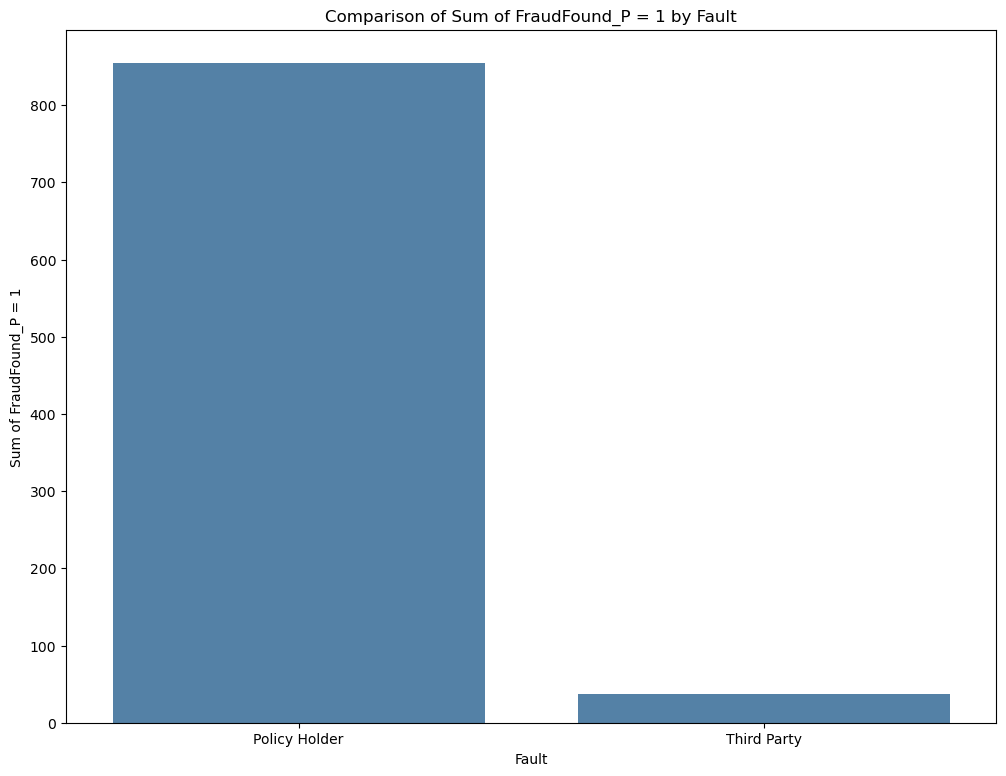

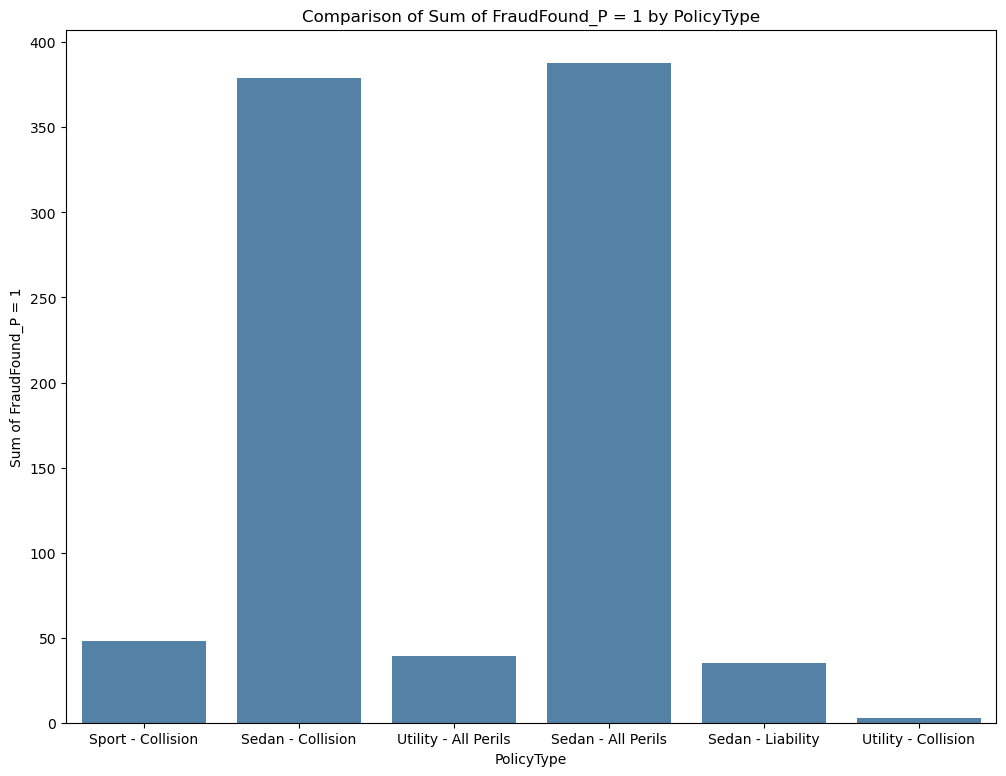

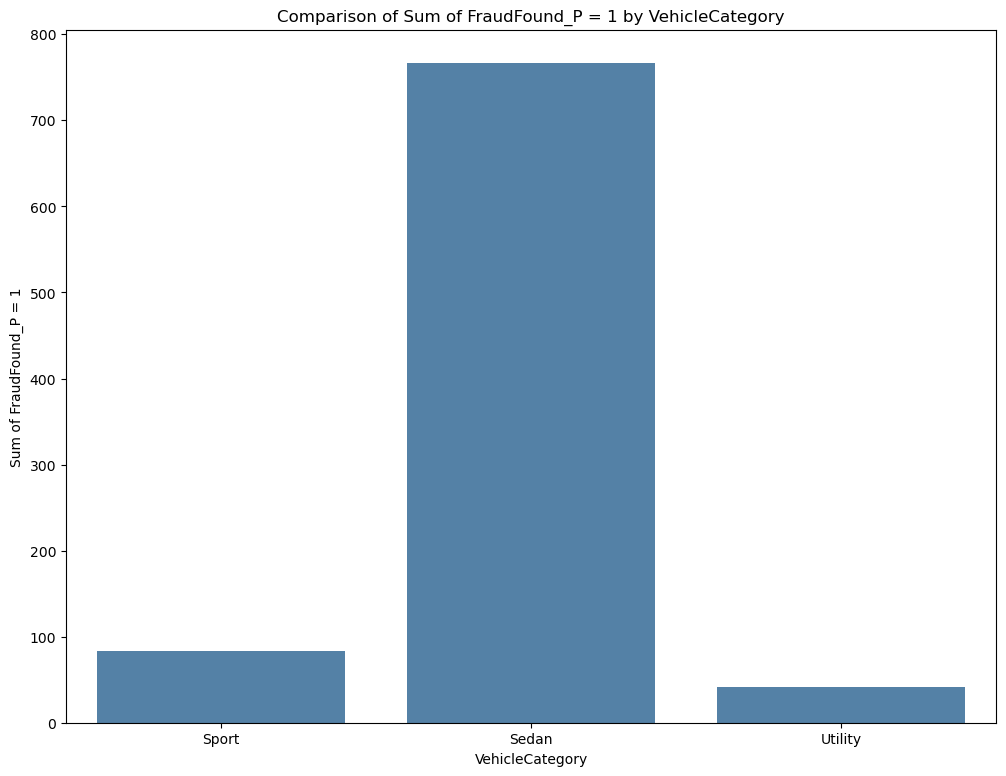

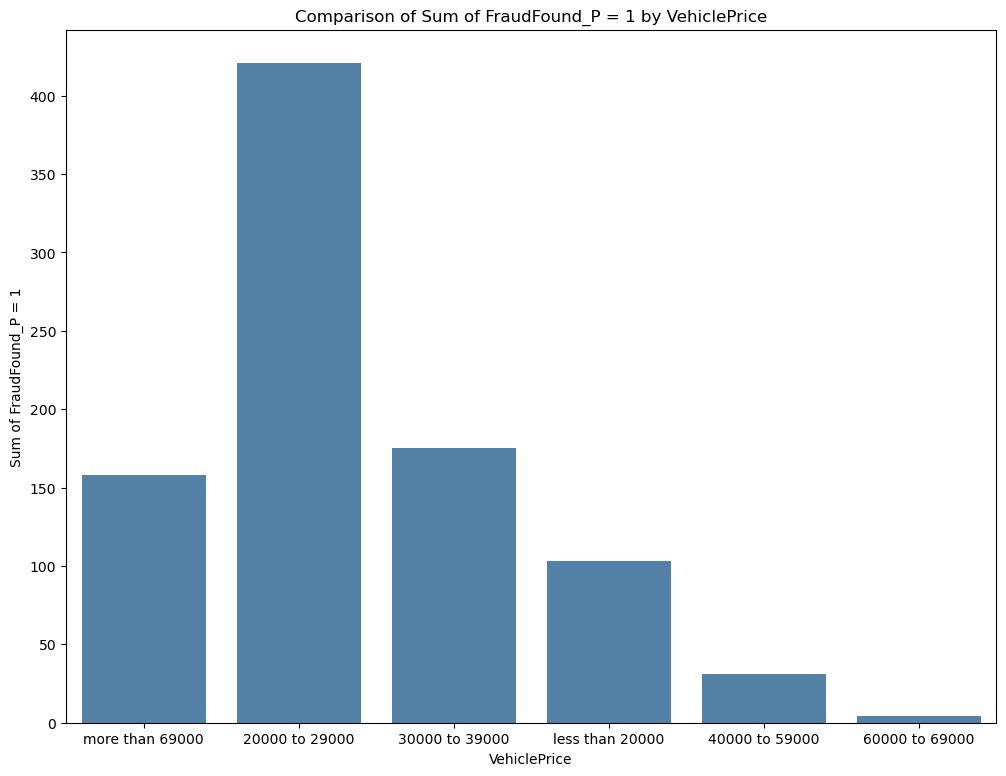

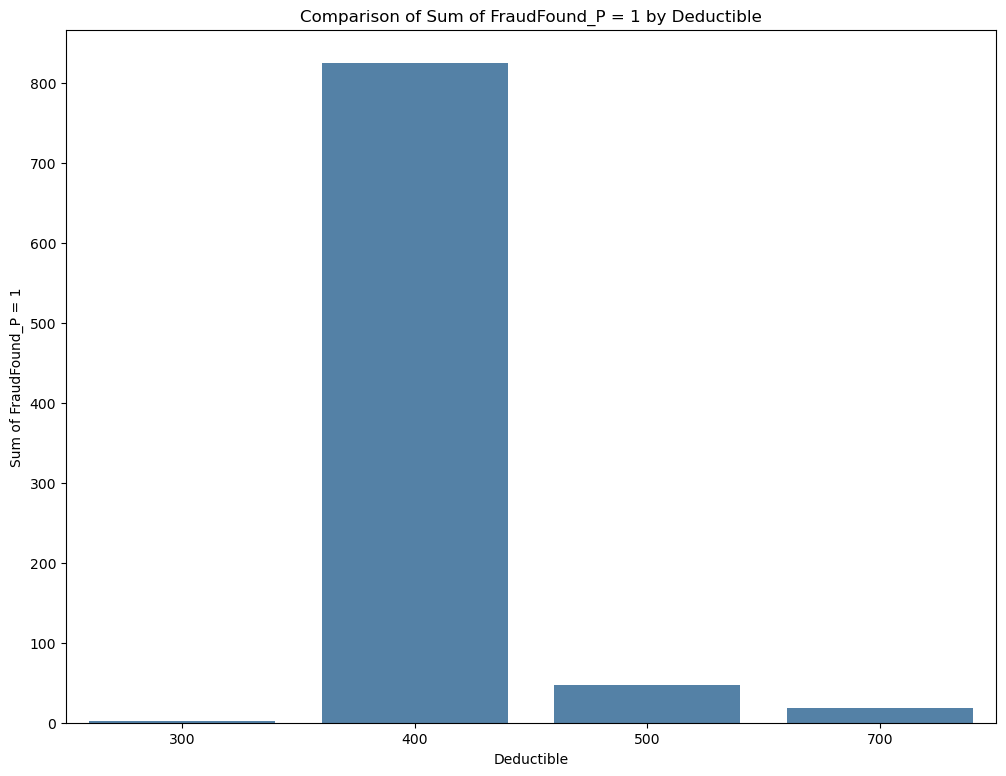

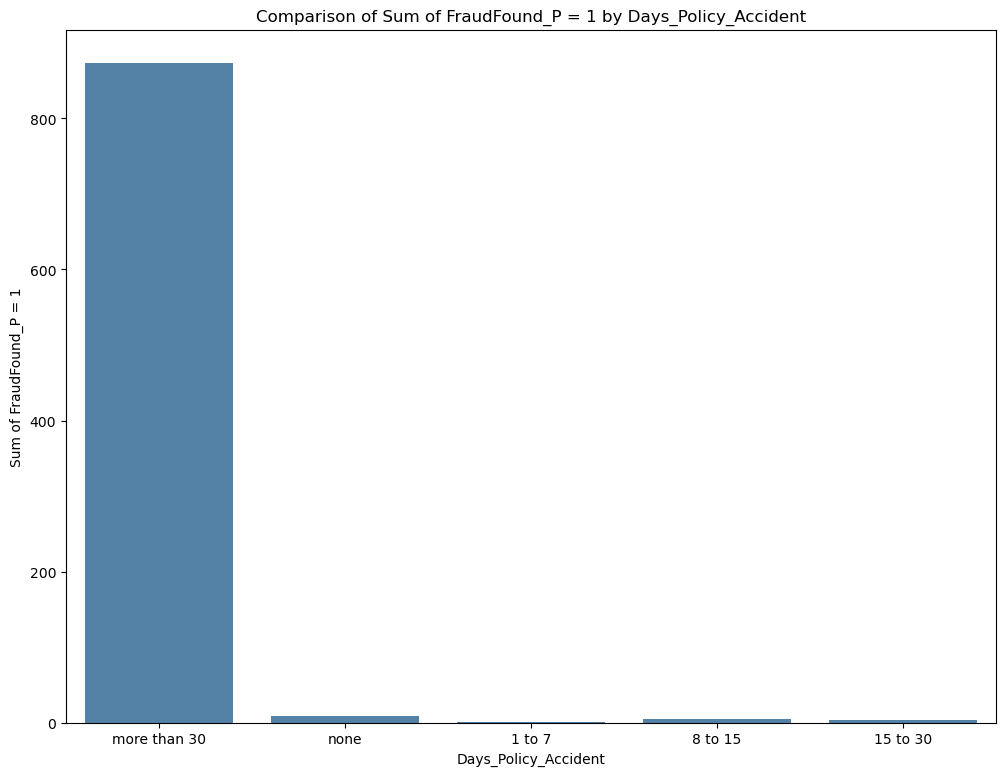

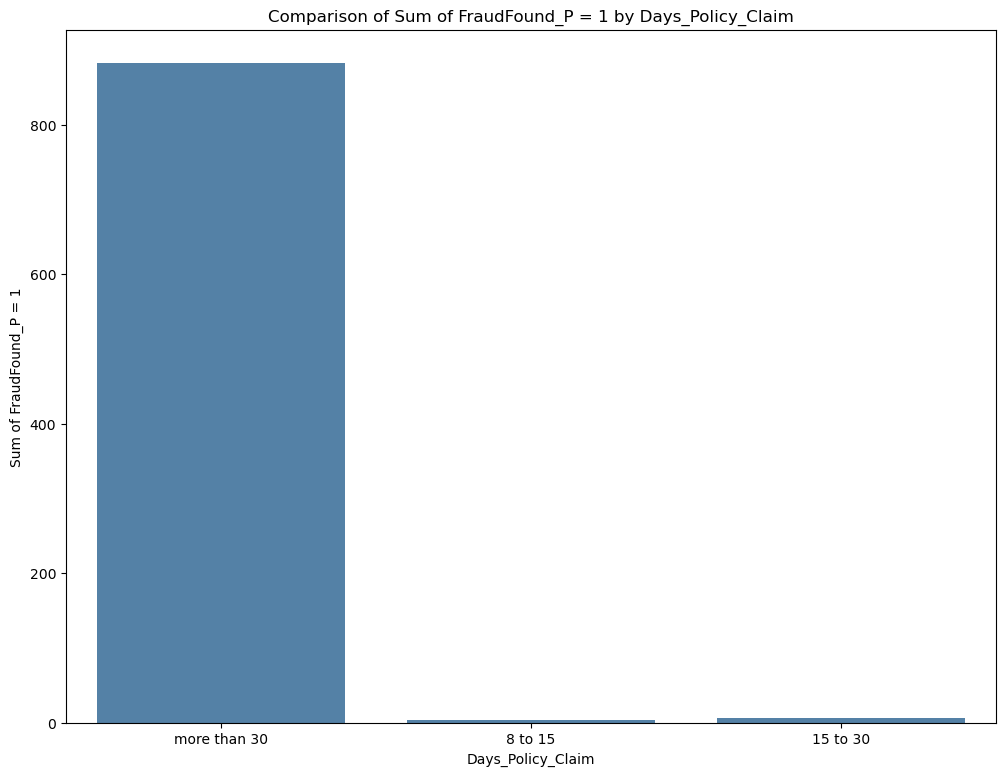

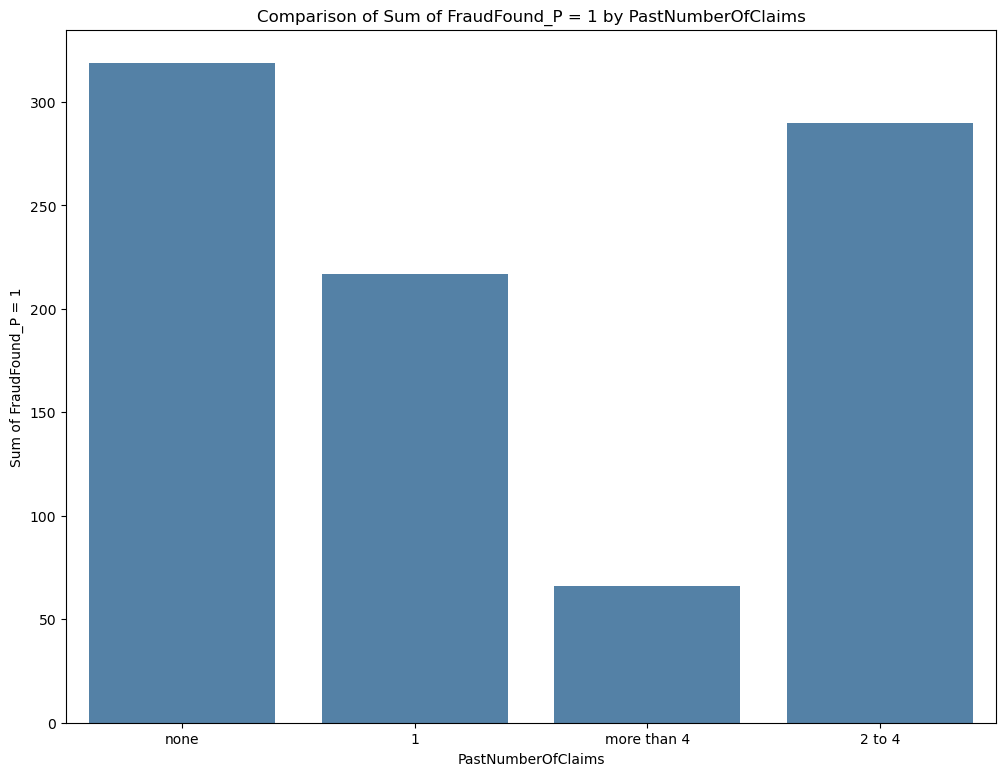

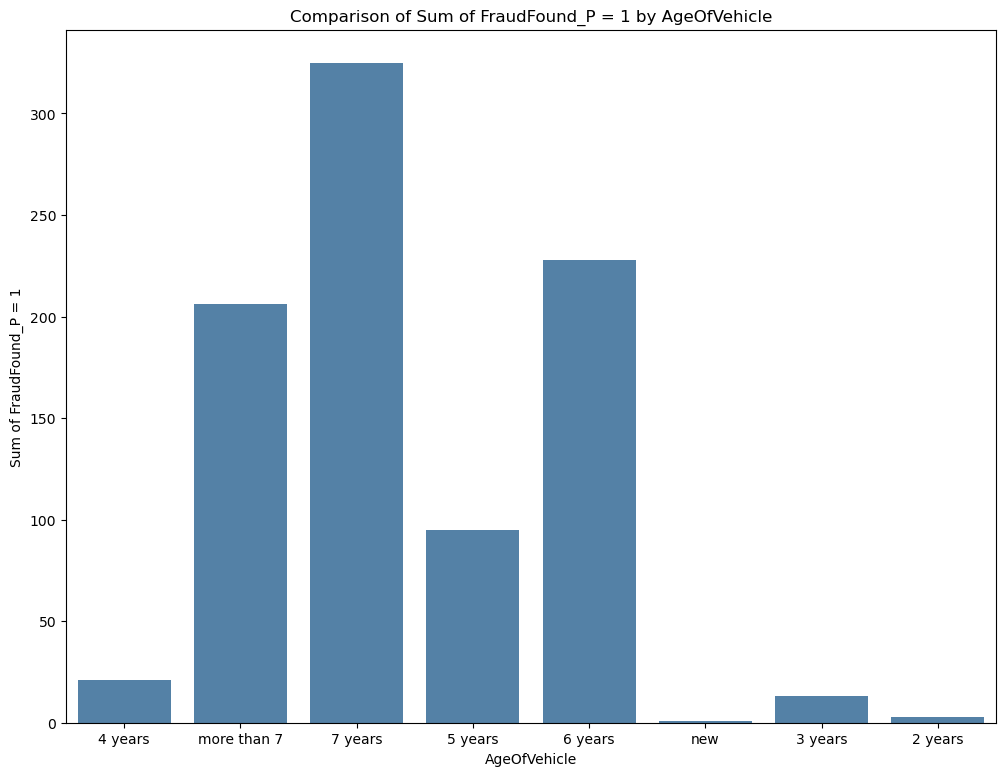

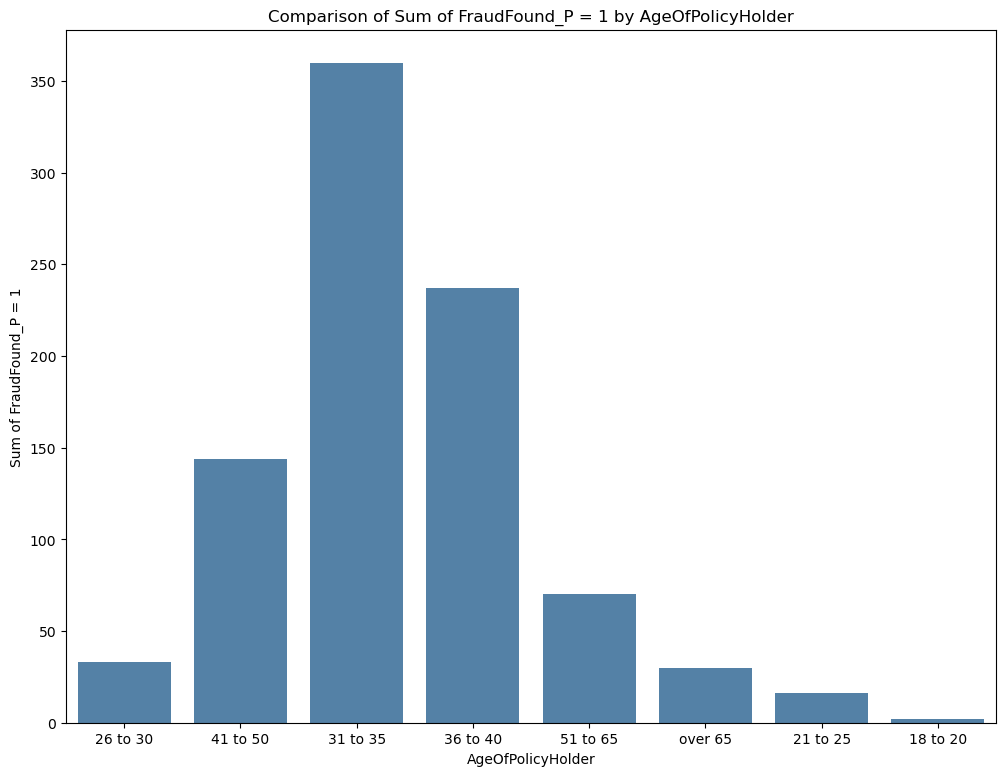

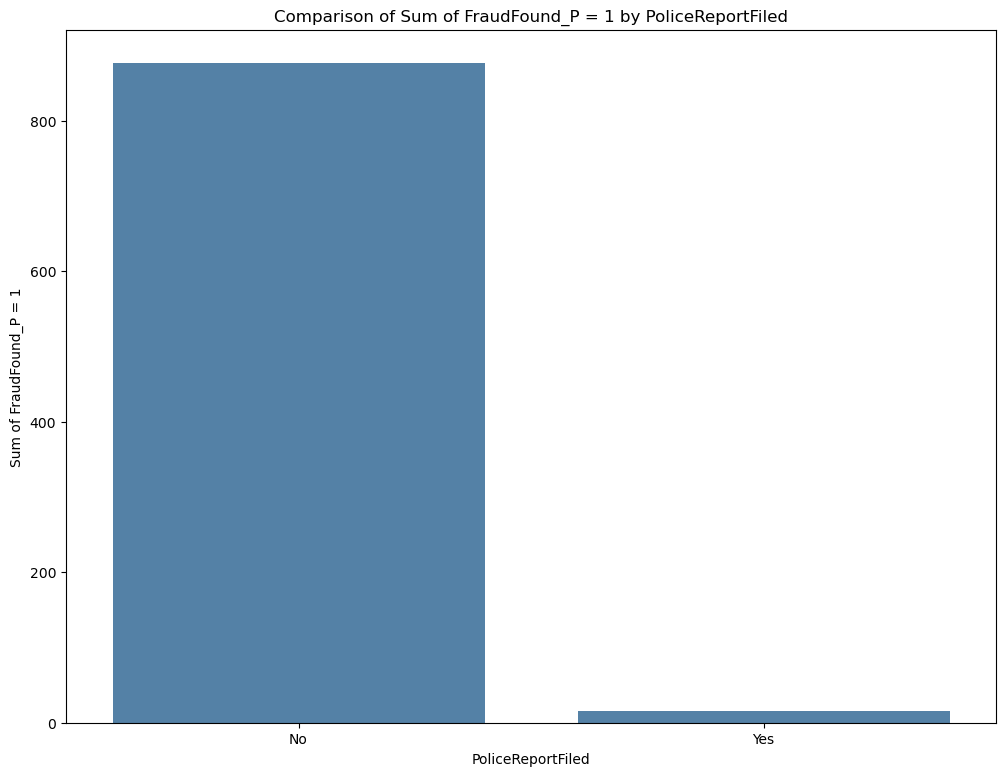

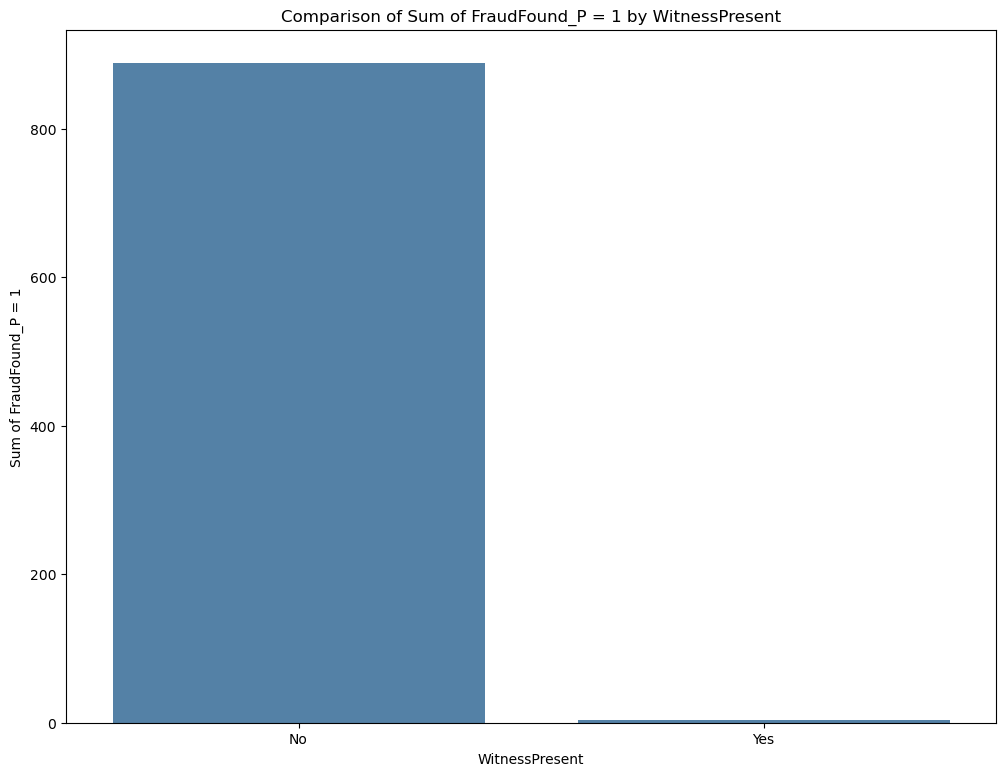

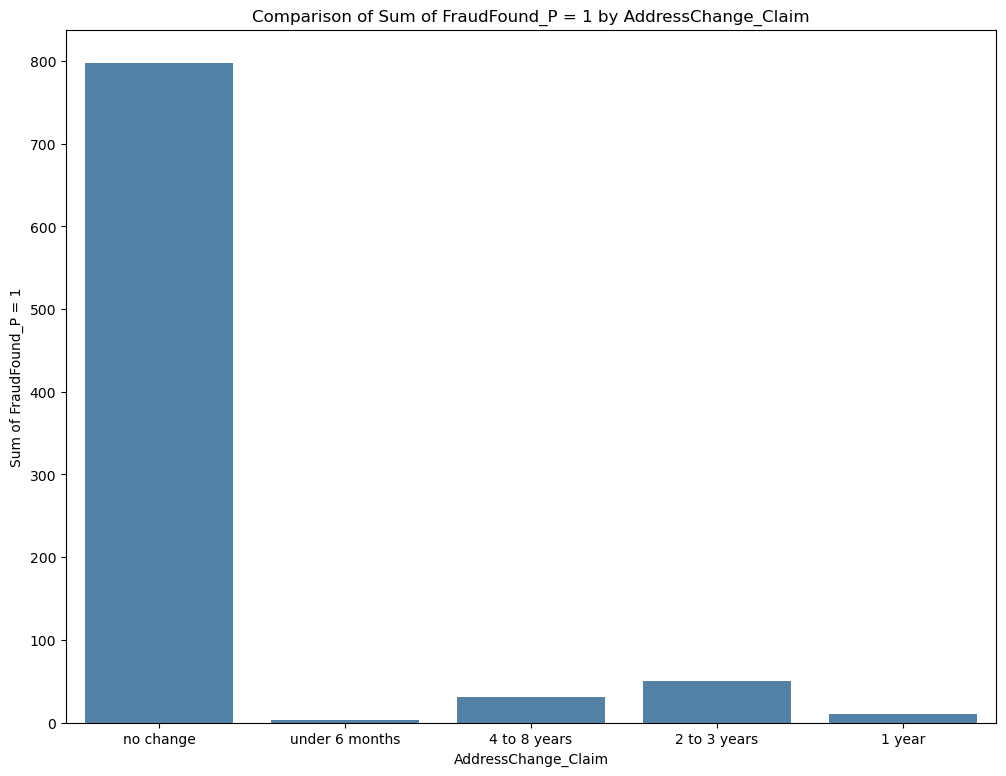

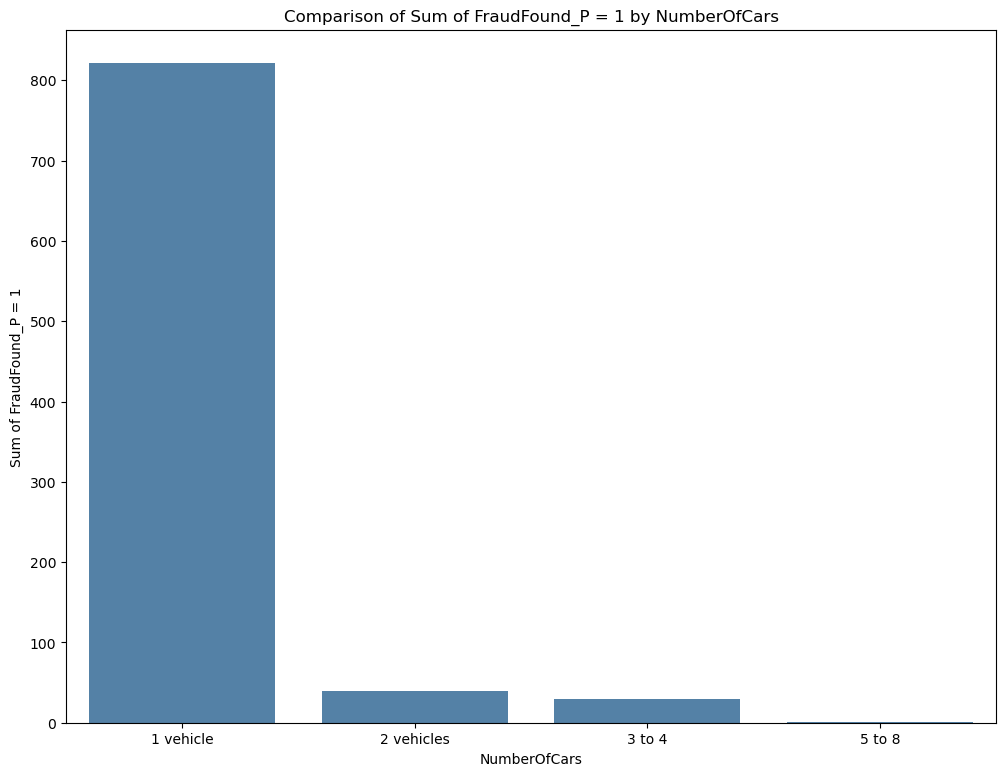

In [14]:
columns_to_compare = ['Make', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
                      'VehiclePrice', 'Deductible', 'Days_Policy_Accident', 'Days_Policy_Claim',
                      'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
                      'WitnessPresent', 'AddressChange_Claim', 'NumberOfCars']

color = 'steelblue'
for column in columns_to_compare:
    plt.figure(figsize=(12, 9))
    sns.barplot(x=column, y='FraudFound_P', data=df_data[df_data['FraudFound_P'] == 1], estimator=sum, color = color)
    plt.xlabel(column)
    plt.ylabel('Sum of FraudFound_P = 1')
    plt.title(f"Comparison of Sum of FraudFound_P = 1 by {column}")
    plt.show()


Now trying to understand the above graphs with numbers and percentages

In [15]:
df_data['FraudFound_P'].value_counts()

0    14208
1      892
Name: FraudFound_P, dtype: int64

# Feature Engineering

In [16]:
#!pip install xgboost

In [17]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')


In the feature Engineering, the following steps are done:

**1- Outlier detection and Handling:**

In this step, we have handled outliers separately for numerical and categorical features. For numerical columns, first we have plotted boxplot to detect which column has the outliers and we got Deductible and Age are the two columns with outliers. We have then removed the outliers with the concept of lower bound and upper bound with inter quartile range. The record that does not fall in range of lower and upper bound is removed.

For categorical columns, we have set a threshold value to 0.0003 that means if any column has a category whose value count percentage falls under the 0.03% will be removed.

**2- Removing unnecessary columns:**
First we removed the PolicyNumber column as it has all unique values for each record that will result in an overfit model and then after the outlier detection, we removed the Deductible as it left with only one value that is 400.

**3- Feature Selection:**
For feature selection, we have used RandomForestClassifier for numerical features and chi square for the categorical features.
Before selecting the features in categorical, it is converted into one hot encoded data, as the model only understands the numerical values. Then the result of importance score from both the method is combined to get an overall importance for all the features. There are total 136 features after one hot encoding the categorical data. We have selected the top 90 features based on their importance score with the target variable.

**4- Scaling:**
The numerical features are different in scale, so we used the StandardScaler to scale the numerical features. Then combined the scaled numerical feature with the one hot encoded data and filtered with top 90 features.

**5- Splitting dataset into train and test:**
The resultant dataset is then split into train and test with 80:20 ratio. Train data to train the model and test data that will be unseen to the model be used for model evaluation. We have used the stratify split to maintain the ratio of imbalance categories in both train and test set.

**6- Oversampling:**
As the dataset is highly imbalanced, we have used oversampling of the data so as to avoid model biasness. For this we used SMOTE method on the train dataset to generate resampled dataset fit for training.

In [18]:
# removing the policy number column as it has all unique values for each record
df_data.drop('PolicyNumber', axis = 1, inplace = True)

WeekOfMonth


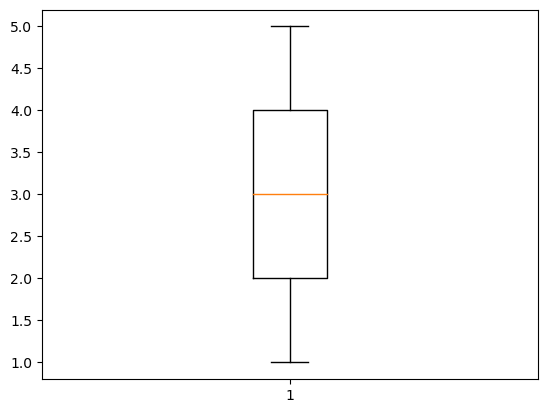

WeekOfMonthClaimed


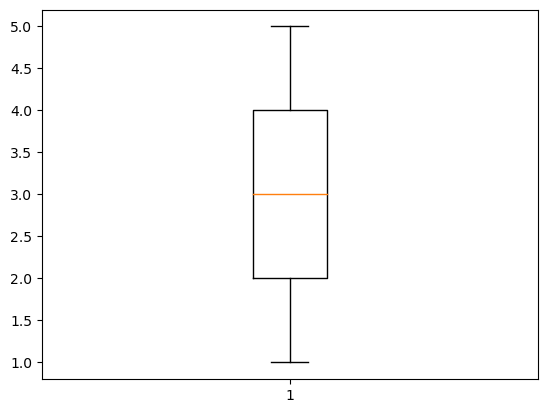

Age


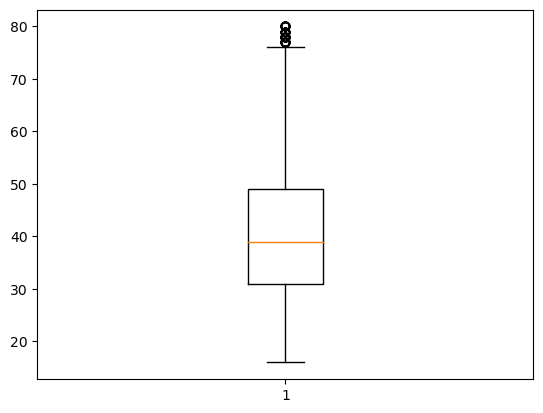

RepNumber


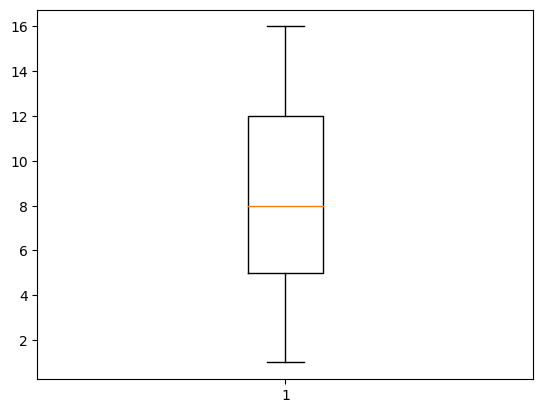

Deductible


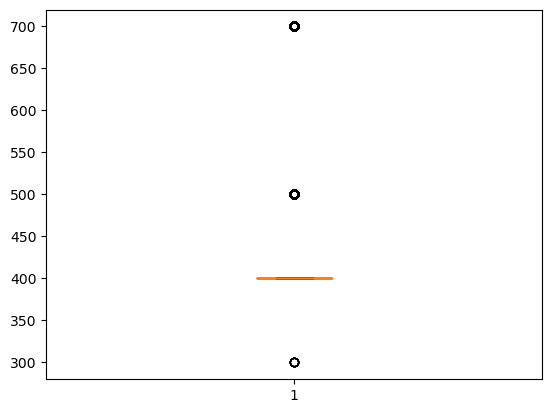

DriverRating


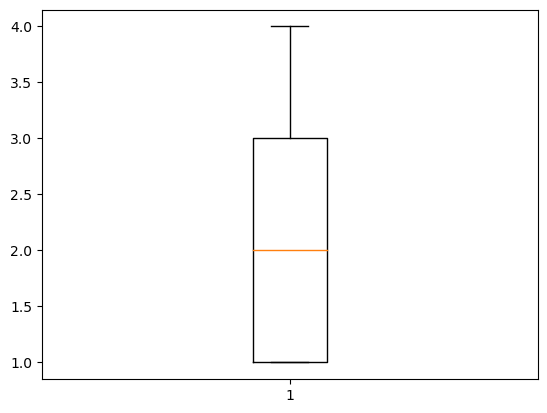

Year


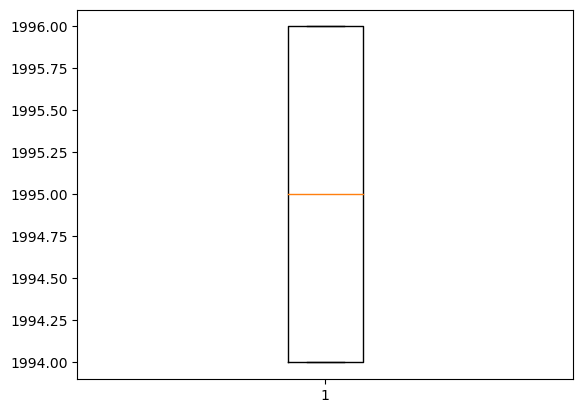

In [19]:
# Separate features (X) and target variable (y)

X = df_data.drop('FraudFound_P', axis=1)
y = df_data['FraudFound_P']

# separate list of numerical and categorical feature names
numerical_features = [i for i in X.describe().columns]
categorical_features = [i for i in X.describe(include = 'object').columns]

# plotting boxplot to see if there is any outliers present in the numerical column
for col in numerical_features:
    print(col)
    plt.boxplot(X[col])
    plt.show()
    

WeekOfMonth


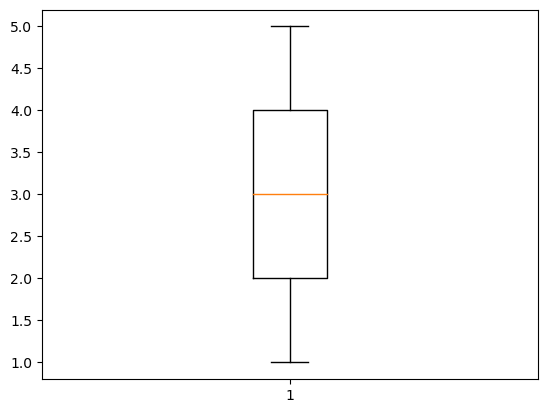

WeekOfMonthClaimed


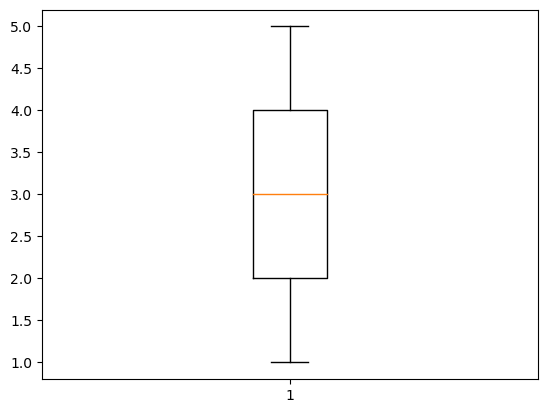

Age


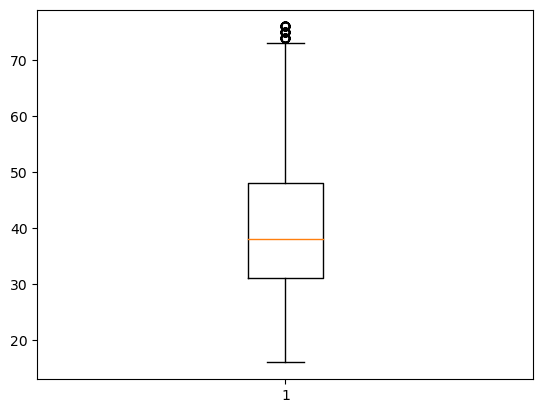

RepNumber


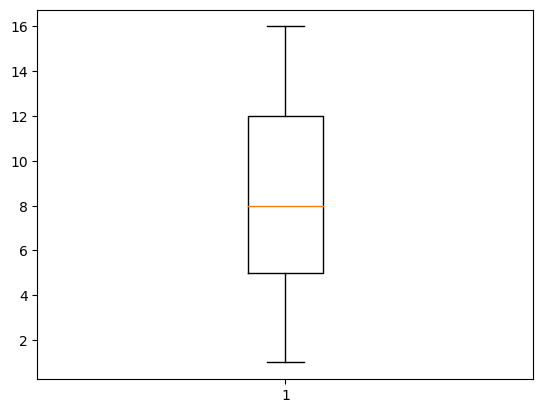

Deductible


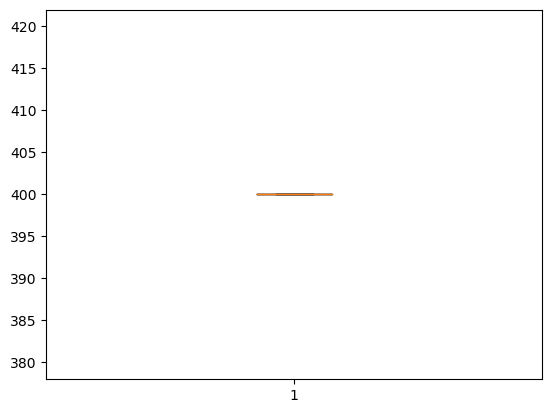

DriverRating


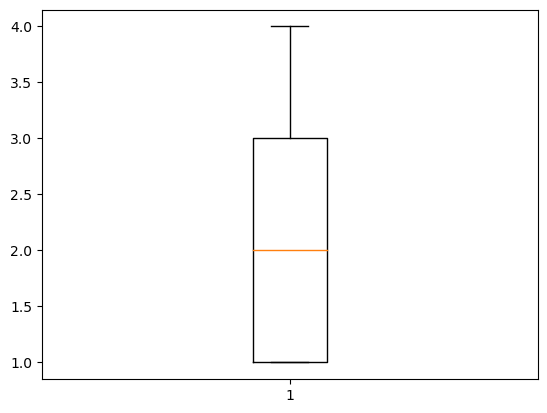

Year


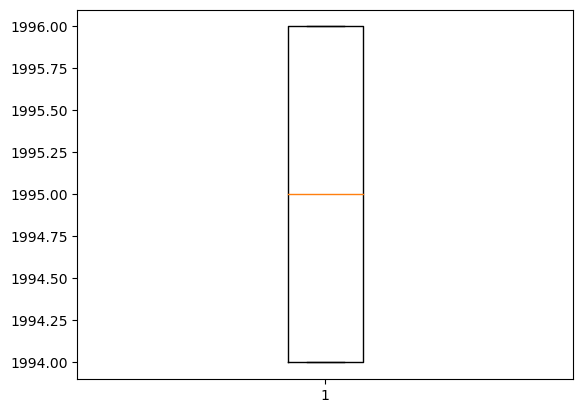

In [20]:
# removing the outliers from the numerical features
for col in numerical_features:
    q1 = np.percentile(df_data[col], 25)
    q3 = np.percentile(df_data[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_data = df_data[(df_data[col] >= lower_bound) & (df_data[col] <= upper_bound)]
    
# again ploting boxplot after removing outliers
for col in numerical_features:
    print(col)
    plt.boxplot(df_data[col])
    plt.show()

In [21]:
# removing the column Deductible as it is left with one value
df_data.drop('Deductible', axis = 1, inplace = True)

In [22]:
# removing outliers in categorical features
threshold = 0.0003
for column in categorical_features:
    
    category_counts = df_data[column].value_counts(normalize=True)
    rare_categories = category_counts[category_counts < threshold].index.tolist()
    df_data = df_data[~df_data[column].isin(rare_categories)]

                           Feature  Importance
69               Fault_Third Party  236.194995
135           BasePolicy_Liability  213.848661
72    PolicyType_Sedan - Liability  212.724107
79           VehicleCategory_Sport  154.939497
133          BasePolicy_All Perils  109.718824
..                             ...         ...
128  AddressChange_Claim_no change    0.005414
9                        Month_Feb    0.003549
117              WitnessPresent_No    0.003548
56                MonthClaimed_Jun    0.002653
18                DayOfWeek_Friday    0.002207

[136 rows x 2 columns]


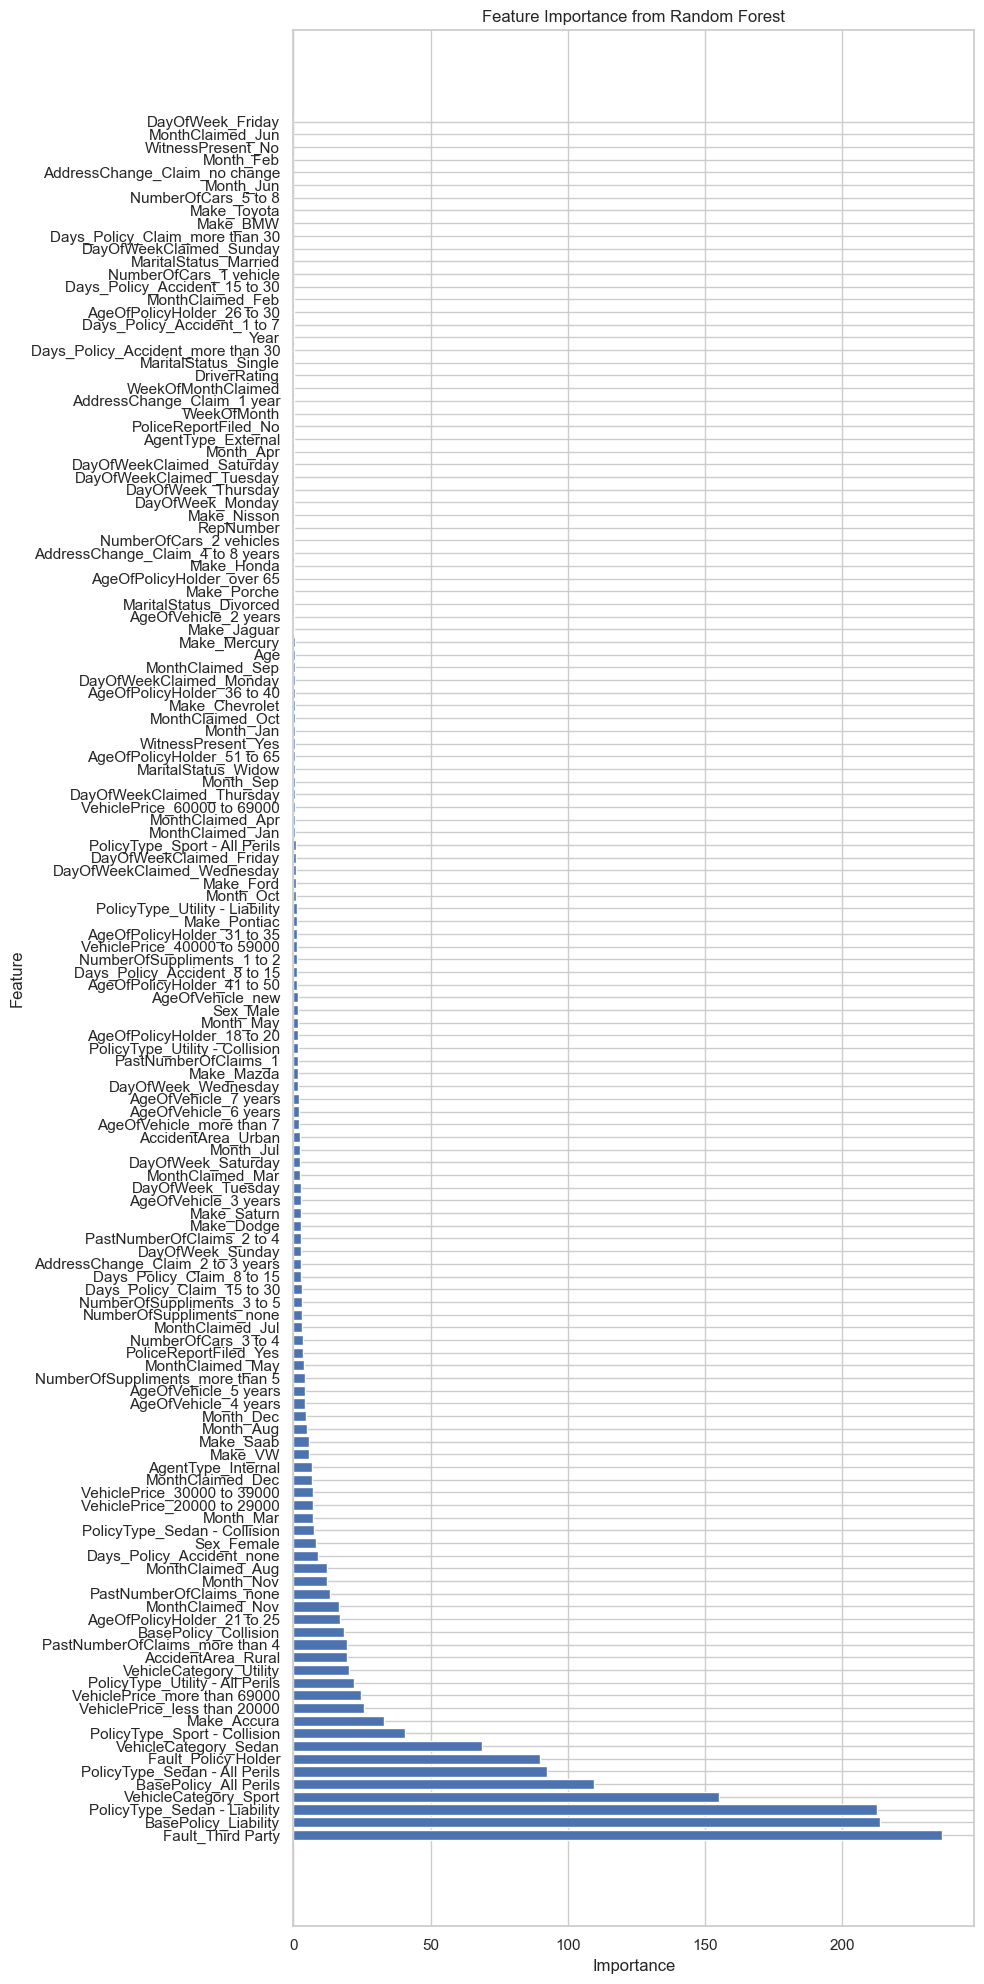

In [66]:
# separating X and y on cleaned dataset
X = df_data.drop('FraudFound_P', axis=1)
y = df_data['FraudFound_P']

# separate list of numerical and categorical feature names
numerical_features = [i for i in X.describe().columns]
categorical_features = [i for i in X.describe(include = 'object').columns]

# one hot encoding categorical features 
X_cat_encoded = pd.get_dummies(X[categorical_features], columns = X.describe(include = 'object').columns)

# Feature selection for numerical features using Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X[numerical_features], y)
num_feature_importances = rf_model.feature_importances_

# Calculate chi-squared statistics and p-values for feature selection
chi2_scores, p_values = chi2(X_cat_encoded, y)

# Combine results 
feature_importances = list(num_feature_importances) + list(chi2_scores)
all_features = numerical_features + [i for i in X_cat_encoded.columns]

feature_selection_results = pd.DataFrame({
    "Feature": all_features,
    "Importance": feature_importances
})

# Sort features by importance
feature_selection_results = feature_selection_results.sort_values(by="Importance", ascending=False)

# Print the sorted feature importance results
print(feature_selection_results)


# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 20))
plt.barh(feature_selection_results['Feature'], feature_selection_results['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()

In [24]:

X_num = X[numerical_features]

# scaling numerical features
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled_df = pd.DataFrame(X_num_scaled, columns = X_num.columns)
X_cat_encoded.index = range(len(X_cat_encoded))

# adding both numerical and categorical feature in one df
X_scaled = pd.concat([X_num_scaled_df,X_cat_encoded], axis = 1)
X_scaled_ = X_scaled[feature_selection_results[:100].Feature.values]

# splitting data into train and test with test size=0.2 and stratify split on y
X_train, X_test, y_train, y_test = train_test_split(X_scaled_, y, test_size = 0.2, random_state = 42, stratify = y)

# Perform oversampling on the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


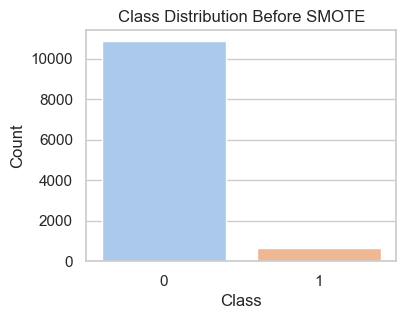

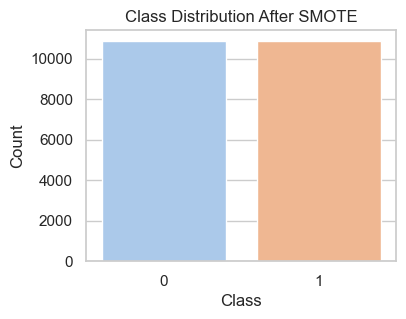

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate class frequencies before and after SMOTE
class_counts_before = y_train.value_counts()
class_counts_after = y_train_resampled.value_counts()

# Plot class distribution using bar plot
plt.figure(figsize=(4, 3))
sns.barplot(x=class_counts_before.index, y=class_counts_before.values, palette='pastel')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution Before SMOTE')
plt.show()

plt.figure(figsize=(4,3))
sns.barplot(x=class_counts_after.index, y=class_counts_after.values, palette='pastel')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution After SMOTE')
plt.show()


# Machine Learning Modelling and Evaluation

Model Selection Reasoning:

- The choice of these models could be due to their established effectiveness in handling imbalanced datasets and their suitability for binary classification tasks like fraud detection.
- Random Forest and Gradient Boosting are ensemble methods that often perform well on imbalanced data by combining multiple weaker models.
- Logistic Regression is a linear model that can be useful for binary classification.
- Support Vector Machines (SVM) can also handle imbalanced data and are known for creating effective decision boundaries.
- Decision Trees are simple yet powerful classifiers that can capture complex relationships in the data.



In [27]:
# Model training
print('Training Random Forest Classifier....')
rfc = RandomForestClassifier( n_estimators = 200, max_depth = 7,criterion = 'entropy',random_state=42)
rfc.fit(X_train_resampled, y_train_resampled)

print('Training Logistic Regression....')
lr = LogisticRegression(C=0.0001,penalty = 'l2',solver = 'sag',random_state=42)
lr.fit(X_train_resampled, y_train_resampled)

print('Training Gradient Boosting Classifier....')
gdc = GradientBoostingClassifier(max_depth = 4, random_state=42)
gdc.fit(X_train_resampled, y_train_resampled)

print('Training Support Vector Machine....')
svc = SVC(C=0.001)
svc.fit(X_train_resampled, y_train_resampled)

print('Training Decision Tree Classifier....')
dtc = DecisionTreeClassifier(max_depth =5, random_state=42)
dtc.fit(X_train_resampled, y_train_resampled)

print('Training XGB Classifier....')
xgb = XGBClassifier(max_depth = 5, eta = 0.01,random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)
print('Training Complete')


Training Random Forest Classifier....
Training Logistic Regression....
Training Gradient Boosting Classifier....
Training Support Vector Machine....
Training Decision Tree Classifier....
Training XGB Classifier....
Training Complete


In [28]:
# Model evaluation
y_pred_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)

y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

y_pred_gdc = gdc.predict(X_test)
accuracy_gdc = accuracy_score(y_test, y_pred_gdc)
precision_gdc = precision_score(y_test, y_pred_gdc)
recall_gdc = recall_score(y_test, y_pred_gdc)
f1_gdc = f1_score(y_test, y_pred_gdc)

y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

y_pred_dtc = dtc.predict(X_test)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
precision_dtc = precision_score(y_test, y_pred_dtc)
recall_dtc = recall_score(y_test, y_pred_dtc)
f1_dtc = f1_score(y_test, y_pred_dtc)

y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print('Random Forest Classifier\n')
print('Accuracy score:', round(accuracy_rfc*100,2))
print('Precision score:', round(precision_rfc*100,2))
print('Recall score:', round(recall_rfc*100,2))
print('F1 score:', round(f1_rfc*100,2))
print('-'*20)
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_rfc))
print('='*50)

print('Logistic Regression\n')
print('Accuracy score:', round(accuracy_lr*100,2))
print('Precision score:', round(precision_lr*100,2))
print('Recall score:', round(recall_lr*100,2))
print('F1 score:', round(f1_lr*100,2))
print('-'*20)
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_lr))
print('='*50)

print('Gradient Boosting Classifier\n')
print('Accuracy score:', round(accuracy_gdc*100,2))
print('Precision score:', round(precision_gdc*100,2))
print('Recall score:', round(recall_gdc*100,2))
print('F1 score:', round(f1_gdc*100,2))
print('-'*20)
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_gdc))
print('='*50)

print('Support Vector Machine\n')
print('Accuracy score:', round(accuracy_svc*100,2))
print('Precision score:', round(precision_svc*100,2))
print('Recall score:', round(recall_svc*100,2))
print('F1 score:', round(f1_svc*100,2))
print('-'*20)
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_svc))
print('='*50)

print('Decision Tree Classifier\n')
print('Accuracy score:', round(accuracy_dtc*100,2))
print('Precision score:', round(precision_dtc*100,2))
print('Recall score:', round(recall_dtc*100,2))
print('F1 score:', round(f1_dtc*100,2))
print('-'*20)
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_dtc))
print('='*50)

print('XGB Classifier\n')
print('Accuracy score:', round(accuracy_xgb*100,2))
print('Precision score:', round(precision_xgb*100,2))
print('Recall score:', round(recall_xgb*100,2))
print('F1 score:', round(f1_xgb*100,2))
print('-'*20)
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_xgb))
print('='*50)

Random Forest Classifier

Accuracy score: 70.14
Precision score: 13.74
Recall score: 80.98
F1 score: 23.49
--------------------
Confusion Matrix:
 [[1888  829]
 [  31  132]]
Logistic Regression

Accuracy score: 69.93
Precision score: 13.12
Recall score: 76.69
F1 score: 22.4
--------------------
Confusion Matrix:
 [[1889  828]
 [  38  125]]
Gradient Boosting Classifier

Accuracy score: 89.58
Precision score: 14.87
Recall score: 17.79
F1 score: 16.2
--------------------
Confusion Matrix:
 [[2551  166]
 [ 134   29]]
Support Vector Machine

Accuracy score: 75.52
Precision score: 12.57
Recall score: 55.83
F1 score: 20.52
--------------------
Confusion Matrix:
 [[2084  633]
 [  72   91]]
Decision Tree Classifier

Accuracy score: 70.38
Precision score: 13.84
Recall score: 80.98
F1 score: 23.63
--------------------
Confusion Matrix:
 [[1895  822]
 [  31  132]]
XGB Classifier

Accuracy score: 69.31
Precision score: 13.77
Recall score: 84.05
F1 score: 23.66
--------------------
Confusion Matrix:

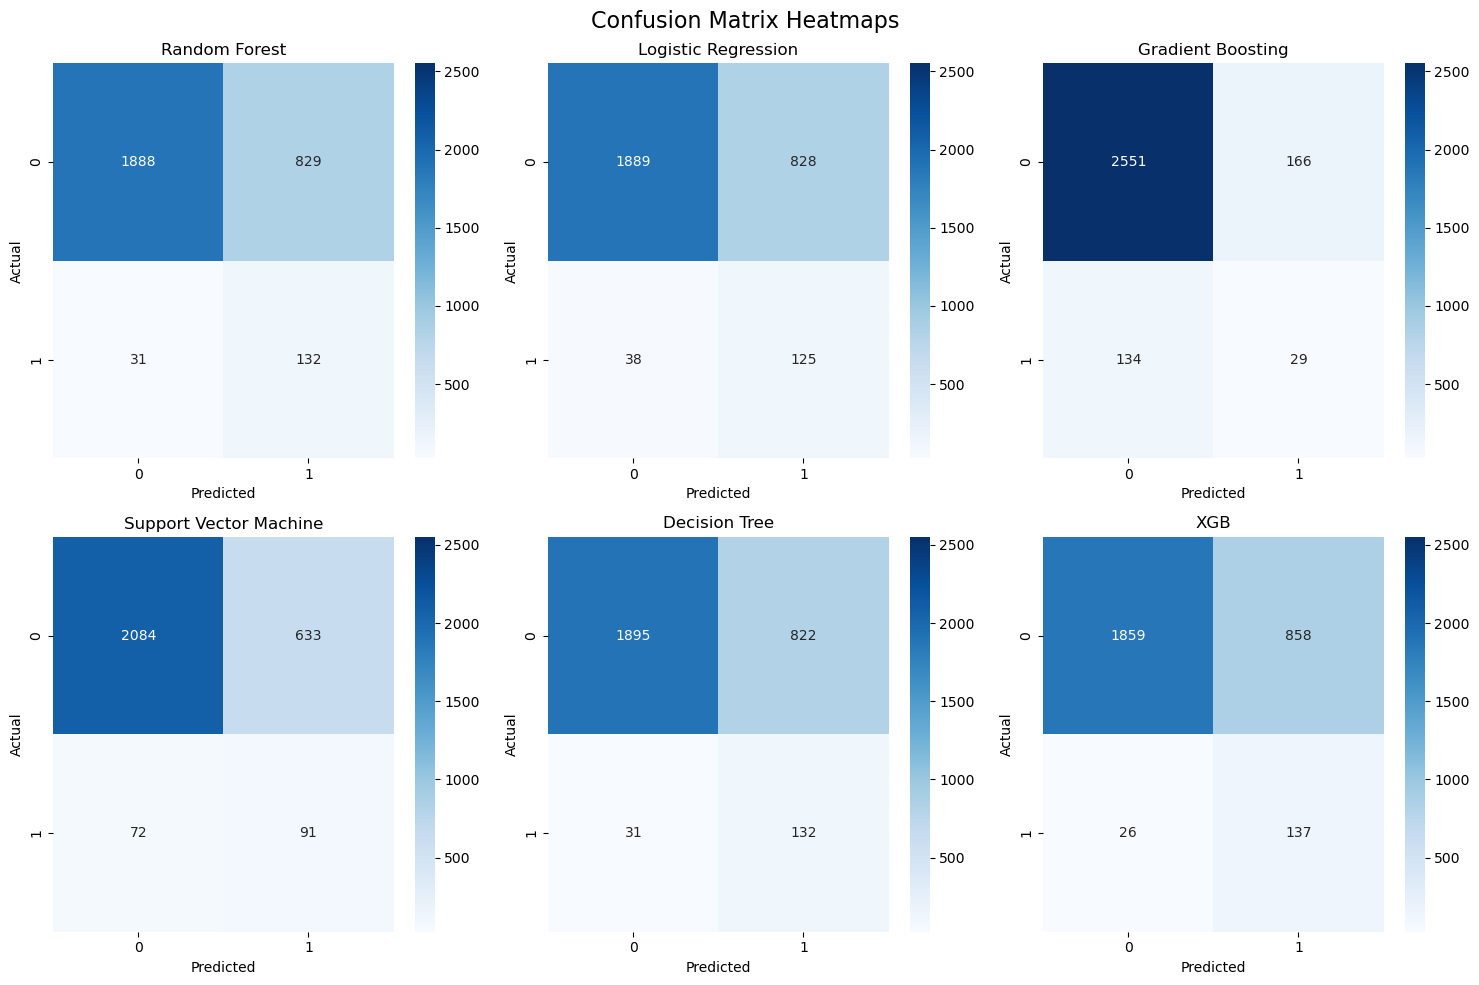

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# List of models and their corresponding predictions
models = [rfc, lr, gdc, svc, dtc, xgb]
model_names = ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'Support Vector Machine', 'Decision Tree', 'XGB']

# Create subplots for each model's confusion matrix heatmap
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Confusion Matrix Heatmaps', fontsize=16)

# Calculate the overall minimum and maximum values in the confusion matrices
min_value = float('inf')
max_value = float('-inf')

for model in models:
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    min_value = min(min_value, cm.min())
    max_value = max(max_value, cm.max())

for model, name, ax in zip(models, model_names, axes.flatten()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax, vmin=min_value, vmax=max_value)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


Precision Recall Curves for the models

Note that SVM has been excluded because the predict_proba method is not available for the SVM model with the parameter probability=False.

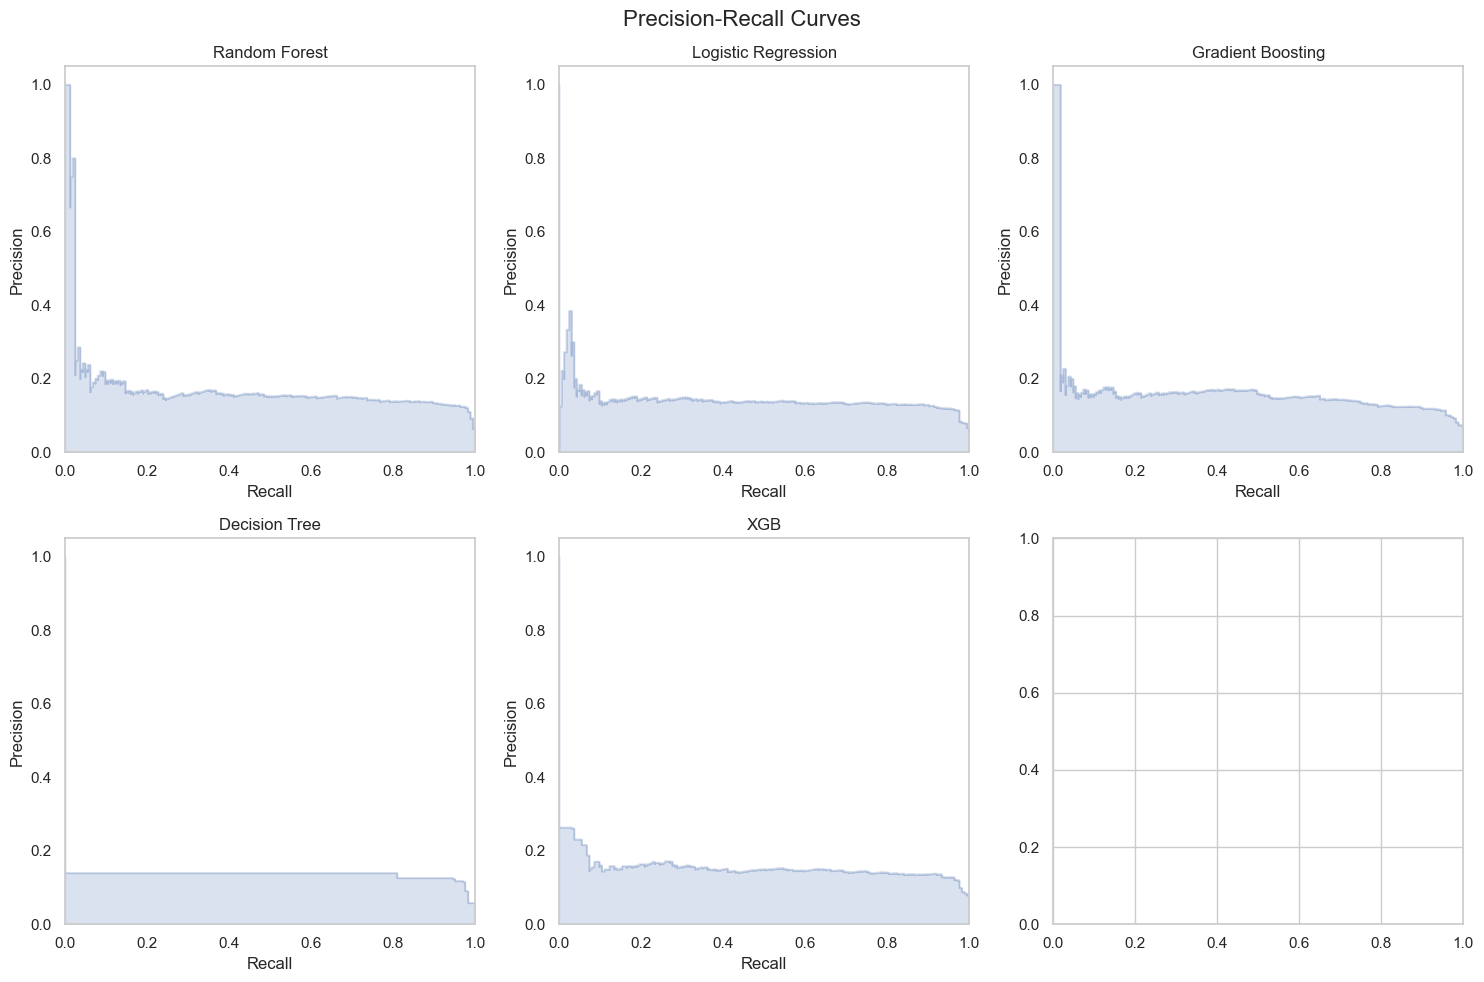

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
# List of models and their corresponding predictions
models = [rfc, lr, gdc, dtc, xgb]  # Exclude SVC
model_names = ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'Decision Tree', 'XGB']

# Create subplots for precision-recall curves
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Precision-Recall Curves', fontsize=16)

for model, name, ax in zip(models, model_names, axes.flatten()):
    if hasattr(model, "predict_proba"):  # Check if the model supports predict_proba
        precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
        ax.step(recall, precision, color='b', alpha=0.2, where='post')
        ax.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_ylim([0.0, 1.05])
    ax.set_xlim([0.0, 1.0])
    ax.set_title(name)
    ax.grid()

plt.tight_layout()
plt.show()


In [48]:
from sklearn.metrics import auc

# Calculate AUC-PR for each model
auc_pr_values = []
for model in models:
    if hasattr(model, "predict_proba"):  # Check if the model supports predict_proba
        precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
        auc_pr = auc(recall, precision)
        auc_pr_values.append(auc_pr)
    else:
        auc_pr_values.append(None)  # No AUC-PR for models without predict_proba

# Print AUC-PR values
for name, auc_pr in zip(model_names, auc_pr_values):
    if auc_pr is not None:
        print(f'{name}: AUC-PR = {auc_pr:.2f}')
    else:
        print(f'{name}: Model does not support predict_proba')


Random Forest: AUC-PR = 0.17
Logistic Regression: AUC-PR = 0.14
Gradient Boosting: AUC-PR = 0.16
Decision Tree: AUC-PR = 0.48
XGB: AUC-PR = 0.16


      Metric  Before Feature Selection  After Feature Selection
0   Accuracy                  0.943403                 0.701389
1  Precision                  0.000000                 0.137357
2     Recall                  0.000000                 0.809816
3   F1-Score                  0.000000                 0.234875


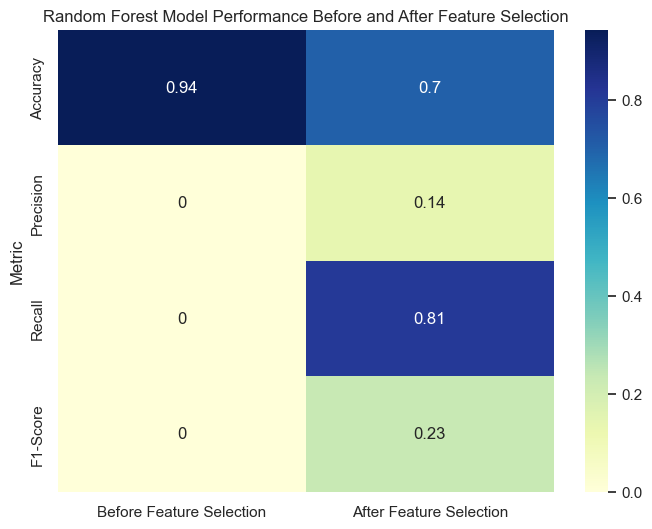

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Train the Random Forest model on the original dataset (before feature selection)
rfc_before = RandomForestClassifier(n_estimators=200, max_depth=7, criterion='entropy', random_state=42)
rfc_before.fit(X_train, y_train)

# Model evaluation before feature selection
y_pred_rfc_before = rfc_before.predict(X_test)
accuracy_rfc_before = accuracy_score(y_test, y_pred_rfc_before)
precision_rfc_before = precision_score(y_test, y_pred_rfc_before)
recall_rfc_before = recall_score(y_test, y_pred_rfc_before)
f1_rfc_before = f1_score(y_test, y_pred_rfc_before)

# Model evaluation after feature selection
y_pred_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)

# Create a dictionary to hold the performance metrics
metrics_dict = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Before Feature Selection": [accuracy_rfc_before, precision_rfc_before, recall_rfc_before, f1_rfc_before],
    "After Feature Selection": [accuracy_rfc, precision_rfc, recall_rfc, f1_rfc]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)
print(metrics_df)

# Create a heatmap to visualize the performance metrics
plt.figure(figsize=(8, 6))
sns.heatmap(metrics_df.set_index("Metric"), annot=True, cmap="YlGnBu")
plt.title("Random Forest Model Performance Before and After Feature Selection")
plt.show()


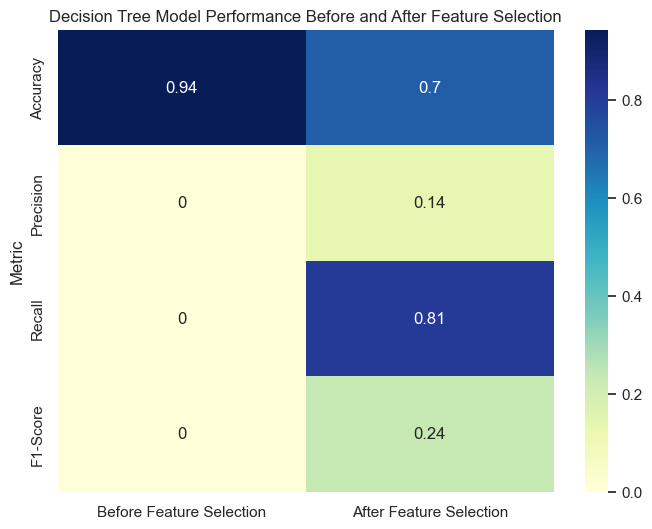

In [51]:
# Train the Decision Tree model on the original dataset (before feature selection)
dtc_before = DecisionTreeClassifier(max_depth=5, random_state=42)
dtc_before.fit(X_train, y_train)

# Model evaluation before feature selection
y_pred_dtc_before = dtc_before.predict(X_test)
accuracy_dtc_before = accuracy_score(y_test, y_pred_dtc_before)
precision_dtc_before = precision_score(y_test, y_pred_dtc_before)
recall_dtc_before = recall_score(y_test, y_pred_dtc_before)
f1_dtc_before = f1_score(y_test, y_pred_dtc_before)

# Train the Decision Tree model on the selected features dataset (after feature selection)
dtc_after = DecisionTreeClassifier(max_depth=5, random_state=42)
dtc_after.fit(X_train_resampled, y_train_resampled)

# Model evaluation after feature selection
y_pred_dtc = dtc_after.predict(X_test)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
precision_dtc = precision_score(y_test, y_pred_dtc)
recall_dtc = recall_score(y_test, y_pred_dtc)
f1_dtc = f1_score(y_test, y_pred_dtc)

# Create a dictionary to hold the performance metrics
metrics_dict = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Before Feature Selection": [accuracy_dtc_before, precision_dtc_before, recall_dtc_before, f1_dtc_before],
    "After Feature Selection": [accuracy_dtc, precision_dtc, recall_dtc, f1_dtc]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Create a heatmap to visualize the performance metrics
plt.figure(figsize=(8, 6))
sns.heatmap(metrics_df.set_index("Metric"), annot=True, cmap="YlGnBu")
plt.title("Decision Tree Model Performance Before and After Feature Selection")
plt.show()


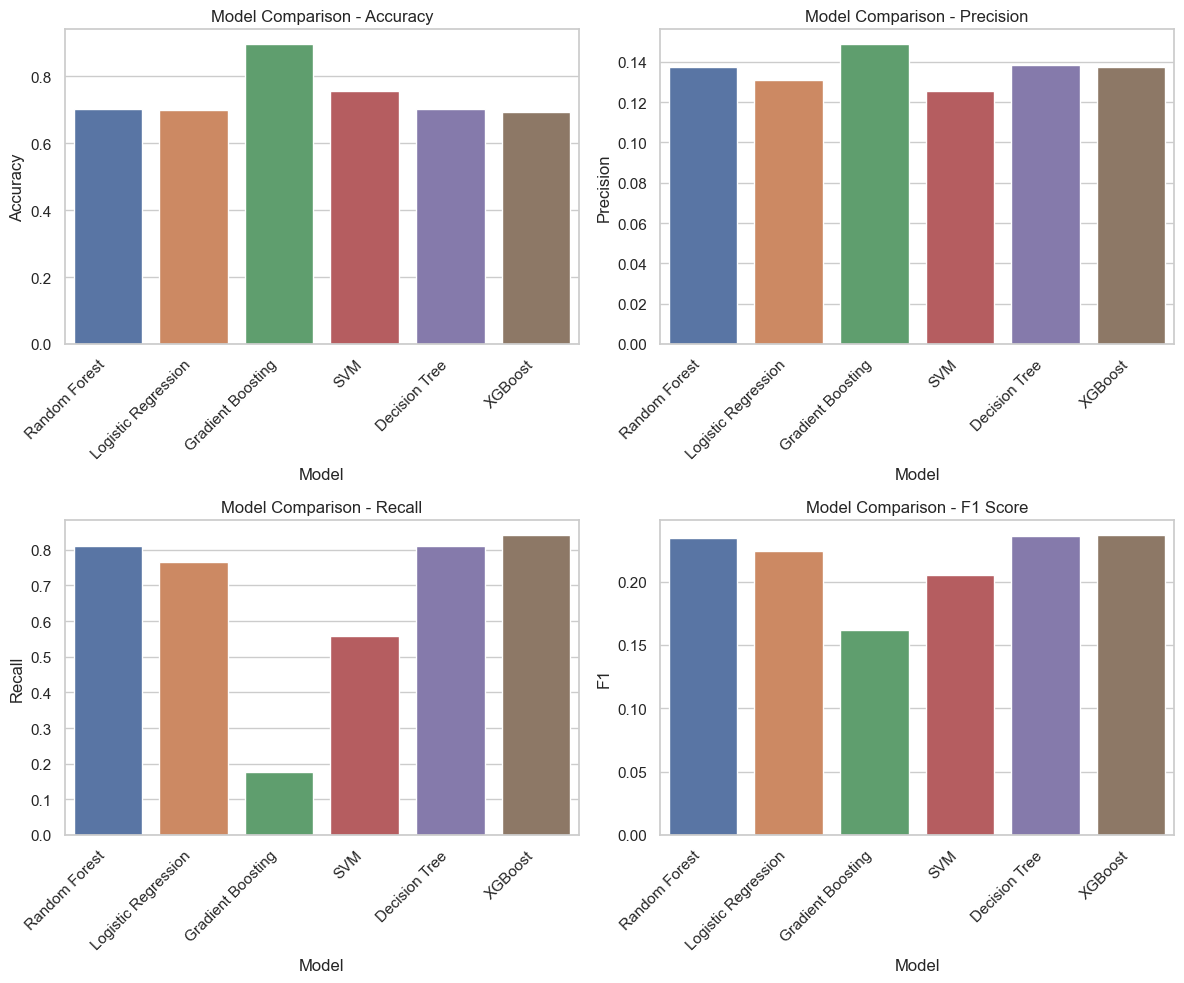

                 Model  Accuracy  Precision    Recall        F1
0        Random Forest  0.701389   0.137357  0.809816  0.234875
1  Logistic Regression  0.699306   0.131165  0.766871  0.224014
2    Gradient Boosting  0.895833   0.148718  0.177914  0.162011
3                  SVM  0.755208   0.125691  0.558282  0.205186
4        Decision Tree  0.703819   0.138365  0.809816  0.236347
5              XGBoost  0.693056   0.137688  0.840491  0.236615


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame to store model predictions
results = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'SVM', 'Decision Tree', 'XGBoost'],
    'Accuracy': [accuracy_rfc, accuracy_lr, accuracy_gdc, accuracy_svc, accuracy_dtc, accuracy_xgb],
    'Precision': [precision_rfc, precision_lr, precision_gdc, precision_svc, precision_dtc, precision_xgb],
    'Recall': [recall_rfc, recall_lr, recall_gdc, recall_svc, recall_dtc, recall_xgb],
    'F1': [f1_rfc, f1_lr, f1_gdc, f1_svc, f1_dtc, f1_xgb]
})

# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)

# Plot accuracy
sns.barplot(x='Model', y='Accuracy', data=results, ax=axes[0, 0])
axes[0, 0].set_title('Model Comparison - Accuracy')

# Plot precision
sns.barplot(x='Model', y='Precision', data=results, ax=axes[0, 1])
axes[0, 1].set_title('Model Comparison - Precision')

# Plot recall
sns.barplot(x='Model', y='Recall', data=results, ax=axes[1, 0])
axes[1, 0].set_title('Model Comparison - Recall')

# Plot F1 score
sns.barplot(x='Model', y='F1', data=results, ax=axes[1, 1])
axes[1, 1].set_title('Model Comparison - F1 Score')

# Rotate x-axis labels for better readability
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display the plots
plt.tight_layout()
plt.show()
print(results)

           Random Forest  Logistic Regression  Gradient Boosting  \
Accuracy        0.701389             0.699306           0.895833   
Precision       0.137357             0.131165           0.148718   
Recall          0.809816             0.766871           0.177914   
F1-Score        0.234875             0.224014           0.162011   

           Support Vector Machine  Decision Tree       XGB  
Accuracy                 0.755208       0.703819  0.693056  
Precision                0.125691       0.138365  0.137688  
Recall                   0.558282       0.809816  0.840491  
F1-Score                 0.205186       0.236347  0.236615  


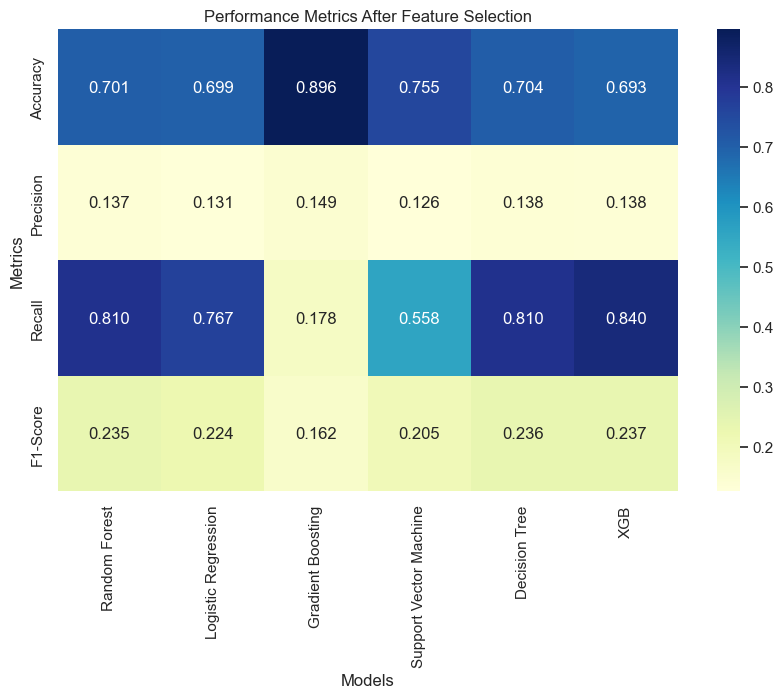

In [60]:
from sklearn.base import clone

# List of models and their corresponding initialization
models = [
    ("Random Forest", RandomForestClassifier(n_estimators=200, max_depth=7, criterion='entropy', random_state=42)),
    ("Logistic Regression", LogisticRegression(C=0.0001, penalty='l2', solver='sag', random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(max_depth=4, random_state=42)),
    ("Support Vector Machine", SVC(C=0.001, probability=True)),
    ("Decision Tree", DecisionTreeClassifier(max_depth=5, random_state=42)),
    ("XGB", XGBClassifier(max_depth=5, eta=0.01, random_state=42))
]

# Initialize an empty dictionary to store performance metrics
performance_metrics = {}

# Loop through each model
for name, model in models:
    # Train the model on the selected features dataset (after feature selection)
    model_after = clone(model)
    model_after.fit(X_train_resampled, y_train_resampled)
    
    # Model evaluation after feature selection
    y_pred_after = model_after.predict(X_test)
    accuracy_after = accuracy_score(y_test, y_pred_after)
    precision_after = precision_score(y_test, y_pred_after)
    recall_after = recall_score(y_test, y_pred_after)
    f1_after = f1_score(y_test, y_pred_after)
    
    # Store the performance metrics in the dictionary
    performance_metrics[name] = {
        "Accuracy": accuracy_after,
        "Precision": precision_after,
        "Recall": recall_after,
        "F1-Score": f1_after
    }

# Create a DataFrame to store the performance metrics
metrics_df = pd.DataFrame(performance_metrics)

# Display the performance metrics DataFrame
print(metrics_df)

# Create a heatmap to visually compare performance metrics
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, fmt=".3f", cmap="YlGnBu", cbar=True)
plt.title("Performance Metrics After Feature Selection")
plt.xlabel("Models")
plt.ylabel("Metrics")
plt.show()


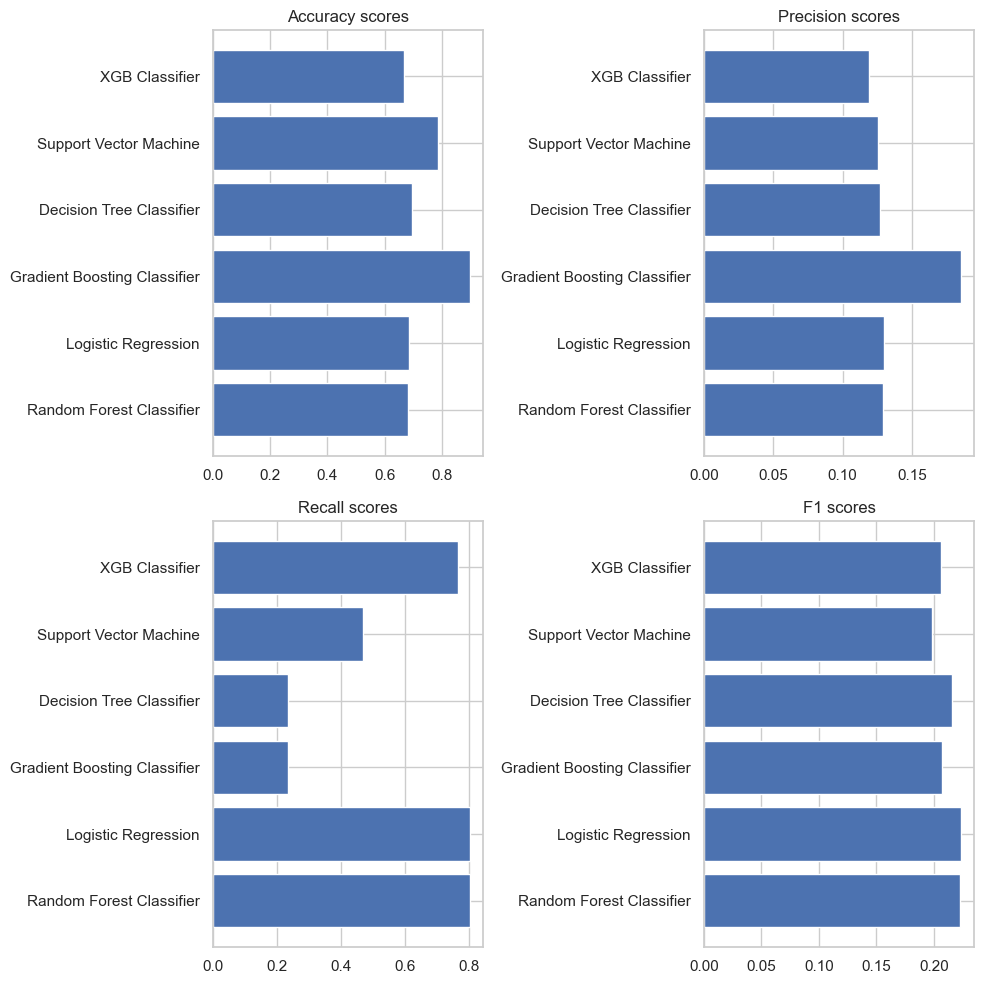

In [47]:
models = ['Random Forest Classifier','Logistic Regression', 'Gradient Boosting Classifier', 'Decision Tree Classifier','Support Vector Machine','XGB Classifier']
accuracy_list = [accuracy_rfc, accuracy_lr, accuracy_gdc, accuracy_dtc, accuracy_svc, accuracy_xgb]
precision_list = [precision_rfc, precision_lr, precision_gdc, precision_dtc, precision_svc, precision_xgb]
recall_list = [recall_rfc, recall_lr, recall_gdc, recall_gdc, recall_svc, recall_xgb]
f1_list = [f1_rfc, f1_lr, f1_gdc, f1_dtc, f1_svc, f1_xgb]

plt.figure(figsize =(10,10))
plt.subplot(2,2,1)
plt.title('Accuracy scores')
plt.barh(models, accuracy_list)
plt.subplot(2,2,2)
plt.title('Precision scores')
plt.barh(models, precision_list)
plt.subplot(2,2,3)
plt.title('Recall scores')
plt.barh(models, recall_list)
plt.subplot(2,2,4)
plt.title('F1 scores')
plt.barh(models, f1_list)
plt.tight_layout()
plt.show()

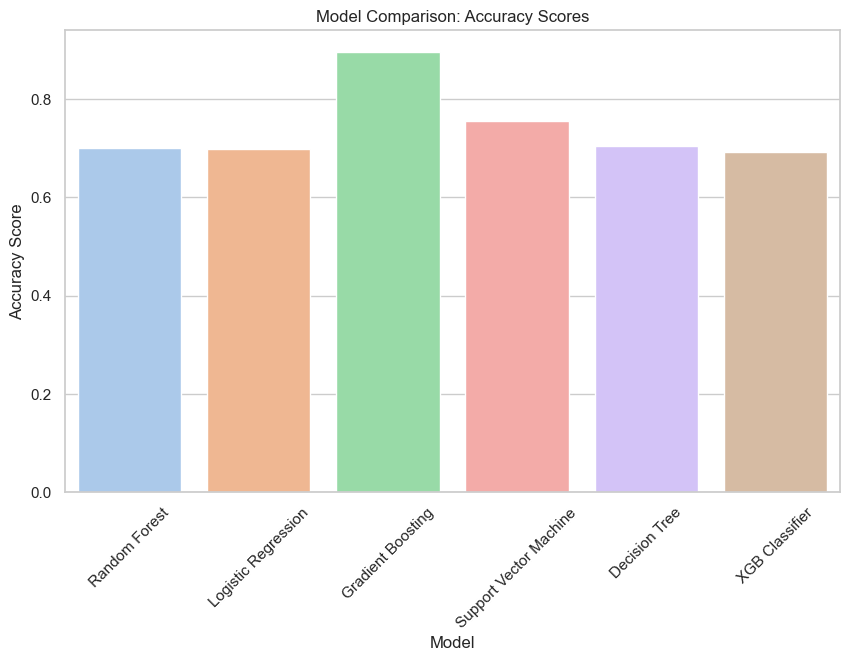

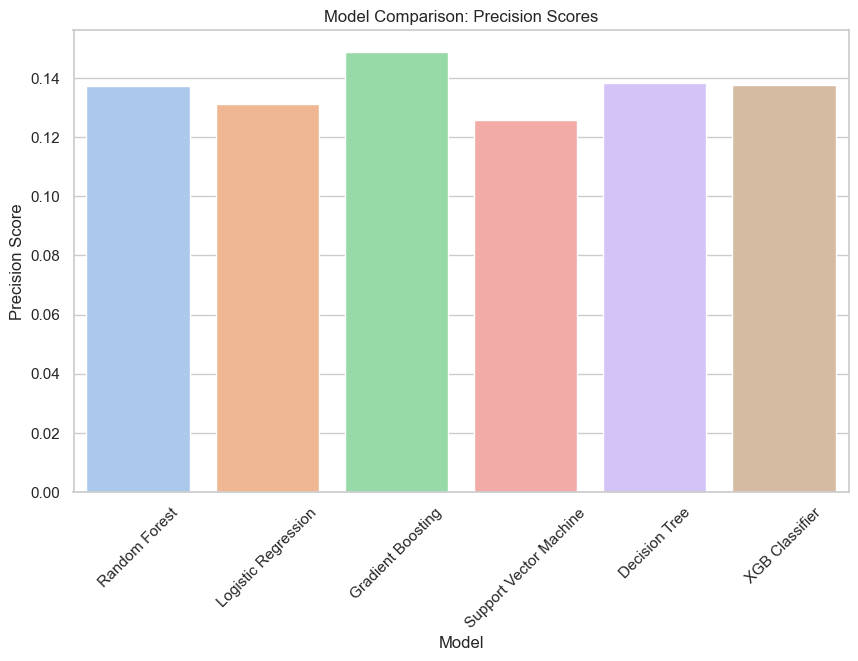

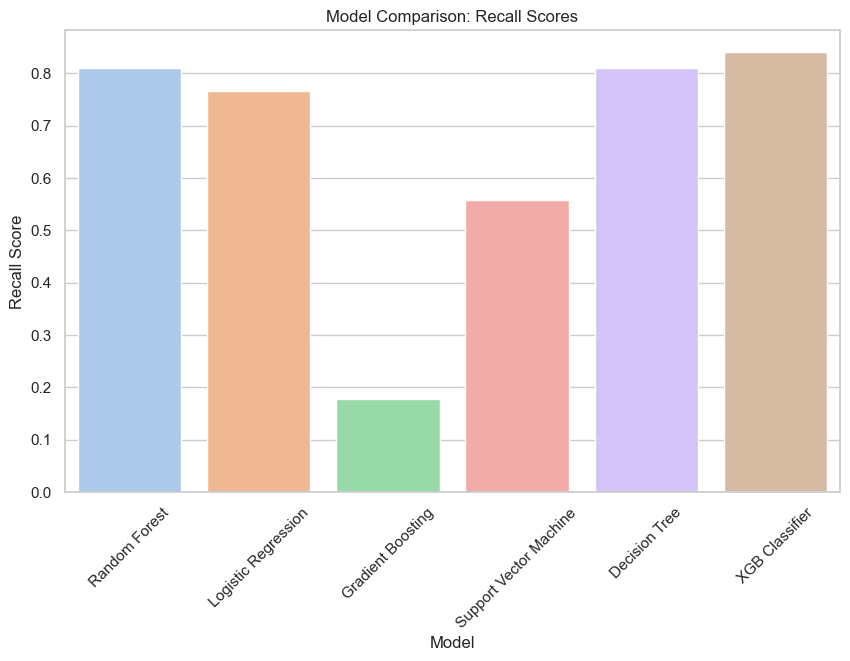

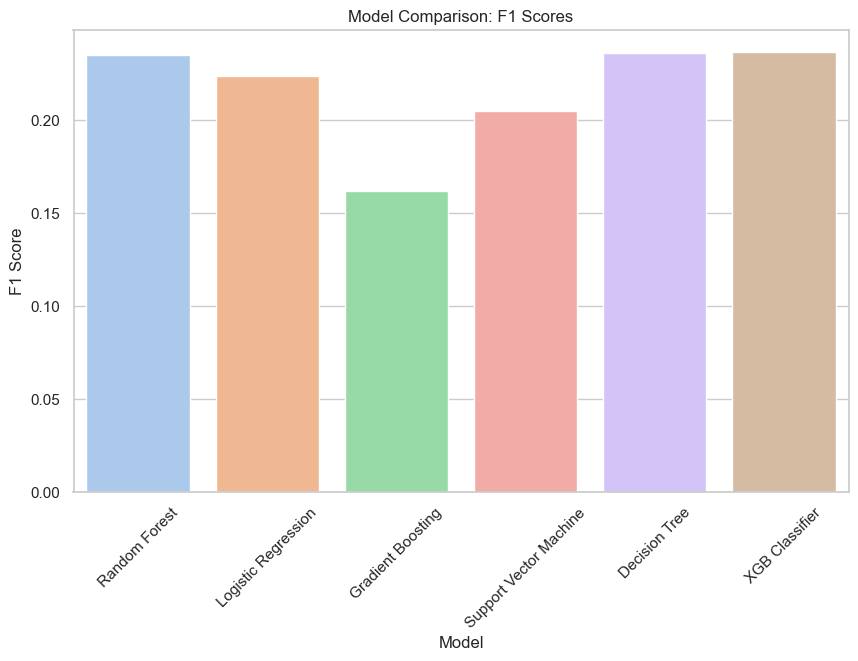

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lists to store the metric scores
models = ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'Support Vector Machine', 'Decision Tree', 'XGB Classifier']
accuracy_scores = [accuracy_rfc, accuracy_lr, accuracy_gdc, accuracy_svc, accuracy_dtc, accuracy_xgb]
precision_scores = [precision_rfc, precision_lr, precision_gdc, precision_svc, precision_dtc, precision_xgb]
recall_scores = [recall_rfc, recall_lr, recall_gdc, recall_svc, recall_dtc, recall_xgb]
f1_scores = [f1_rfc, f1_lr, f1_gdc, f1_svc, f1_dtc, f1_xgb]

# Create a bar plot for Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy_scores, palette='pastel')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison: Accuracy Scores')
plt.xticks(rotation=45)
plt.show()

# Create a bar plot for Precision
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=precision_scores, palette='pastel')
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.title('Model Comparison: Precision Scores')
plt.xticks(rotation=45)
plt.show()

# Create a bar plot for Recall
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=recall_scores, palette='pastel')
plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.title('Model Comparison: Recall Scores')
plt.xticks(rotation=45)
plt.show()

# Create a bar plot for F1-score
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=f1_scores, palette='pastel')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Model Comparison: F1 Scores')
plt.xticks(rotation=45)
plt.show()


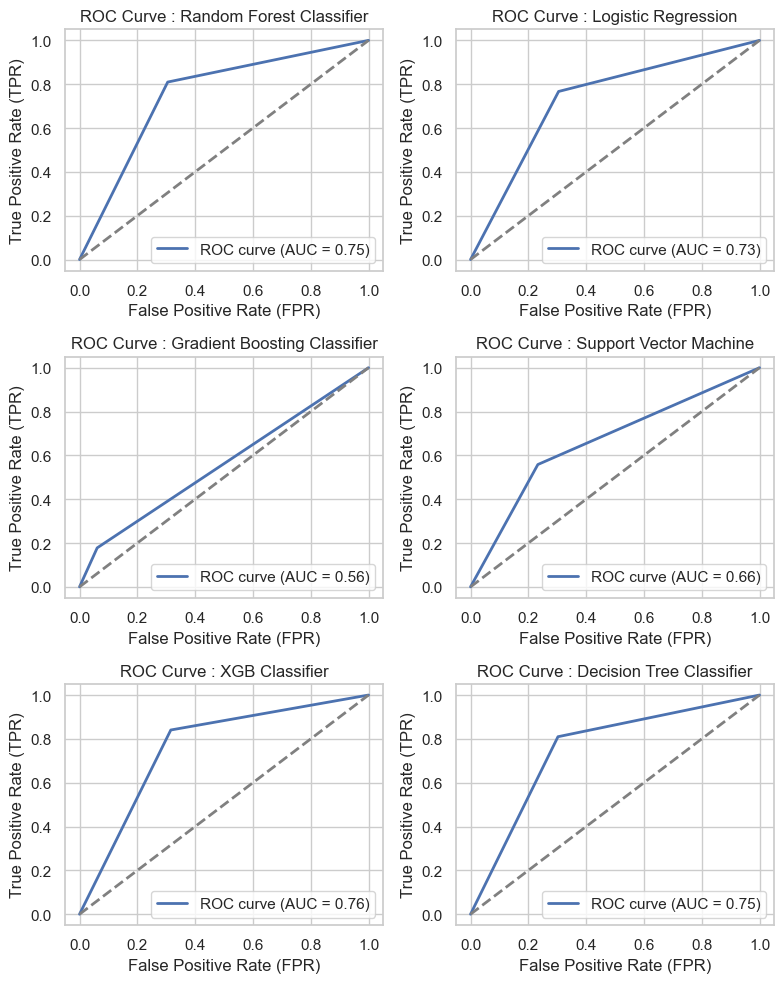

In [63]:
roc_auc = roc_auc_score(y_test, y_pred_rfc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfc)
plt.figure(figsize=(8, 10))
plt.subplot(3,2,1)

plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2) 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve : Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)

roc_auc = roc_auc_score(y_test, y_pred_lr)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
plt.subplot(3,2,2)
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2) 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve : Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)

roc_auc = roc_auc_score(y_test, y_pred_gdc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gdc)
plt.subplot(3,2,3)
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve : Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.grid(True)

roc_auc = roc_auc_score(y_test, y_pred_svc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)
plt.subplot(3,2,4)
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2) 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve : Support Vector Machine')
plt.legend(loc='lower right')
plt.grid(True)

roc_auc = roc_auc_score(y_test, y_pred_xgb)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
plt.subplot(3,2,5)
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve : XGB Classifier')
plt.legend(loc='lower right')
plt.grid(True)

roc_auc = roc_auc_score(y_test, y_pred_dtc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dtc)
plt.subplot(3,2,6)
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve : Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()



**Best Model Reason:** Among the trained models, the one that might be considered the best for detecting fraud depends on the specific priorities of the task. In our case recall score and accuracy score are the priority. The Decision Tree Classifier stands out as the optimal model due to its remarkable combination of high accuracy and exceptional recall scores. Among the evaluated models, the Decision Tree Classifier demonstrated an accuracy rate of 70.38%, indicating its proficiency in correctly classifying both fraudulent and legitimate transactions. Moreover, its outstanding recall score of 80.98% reflects its unparalleled ability to identify the vast majority of actual fraud cases. This is particularly crucial in fraud detection scenarios where missing even a single instance of fraud can have severe financial implications. By leveraging its inherent capacity to discern intricate patterns within the data, the Decision Tree Classifier achieves this balance between accuracy and recall, providing a robust and reliable solution that aligns perfectly with the priorities of our fraud detection endeavor. 
